In [62]:
import numpy as np
import pandas as pd
import json
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline
import string
from wordcloud import WordCloud, STOPWORDS
from scipy import stats

### The imported csv file contains the YouTube videos and channels that have been pulled from YouTube API and cleaned accordingly. 

In [2]:
df_video_channel = pd.read_csv('D:/DataScienceFoundation/SpringBoard/YouTube Project/youtube-new/video_channel_export.csv', encoding= "ISO-8859-1")

C:\Users\EliEm\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (0,1,2,3,4,5,7,8,13,14,15,16,17,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df_video_channel.head(3)

,Unnamed: 0,video_id,trending_date,title,channel_title,category,category_id,publish_time,tags,views,...,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,channel_description,channel_etag
0,0,Zqv5CBWt9yA,2018-06-14 00:00:00,Bhuvan Bam- Safar | Official Music Video |,BB Ki Vines,Entertainment,24.0,2018-06-13 07:13:43,"safar|""travel""|""bhuvan bam""|""music""|""journey""|...",3854712.0,...,14650.0,55735.0,https://i.ytimg.com/vi/Zqv5CBWt9yA/default.jpg,False,False,False,Bhuvan Bam releases his 3rd single 'Safar' in ...,IN,BB Ki Vines is about BB and some funny instanc...,"""0UM_wBUsFuT6ekiIlwaHvyqc80M/5yXczLj4QG1sbTSVO..."
1,1,g2orJgNOpnU,2018-06-13 00:00:00,BB Ki Vines- | Alvida Dost |,BB Ki Vines,Entertainment,24.0,2018-06-06 12:02:47,"friends|""fight""|""humour""|""funny""|""comedy""|""bhu...",10433510.0,...,17155.0,68078.0,https://i.ytimg.com/vi/g2orJgNOpnU/default.jpg,False,False,False,Is this the last time BB and Bancho talk? A he...,IN,BB Ki Vines is about BB and some funny instanc...,"""0UM_wBUsFuT6ekiIlwaHvyqc80M/5yXczLj4QG1sbTSVO..."
2,2,T9WN2_ikz6Q,2018-04-15 00:00:00,BB Ki Vines- | The Sacrifice |,BB Ki Vines,Entertainment,24.0,2018-04-09 10:21:36,"sacrifice|""parents""|""laptop""|""office""|""bonus""|...",7769007.0,...,9373.0,125740.0,https://i.ytimg.com/vi/T9WN2_ikz6Q/default.jpg,False,False,False,Dad's got a bonus from office. How will he spe...,IN,BB Ki Vines is about BB and some funny instanc...,"""0UM_wBUsFuT6ekiIlwaHvyqc80M/5yXczLj4QG1sbTSVO..."


In [4]:
df_video_channel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99201 entries, 0 to 99200
Data columns (total 21 columns):
Unnamed: 0                99201 non-null object
video_id                  58913 non-null object
trending_date             58910 non-null object
title                     58913 non-null object
channel_title             58770 non-null object
category                  58639 non-null object
category_id               58770 non-null float64
publish_time              58770 non-null object
tags                      58770 non-null object
views                     58770 non-null float64
likes                     58770 non-null float64
dislikes                  58770 non-null float64
comment_count             58770 non-null float64
thumbnail_link            58770 non-null object
comments_disabled         58770 non-null object
ratings_disabled          58770 non-null object
video_error_or_removed    58770 non-null object
description               57273 non-null object
country               

#### We are looking into 'views' column in our project mainly. We have to drop the records with the empty/null value of views 

In [5]:
data = df_video_channel.dropna(subset = ['views'])

In [6]:
views = np.array(data['views'])
len(views)

58770

In [7]:
x = data[['views','country']].groupby('country').sum().sort_values(by='views')
x

,views
country,
JP,2.210588e+08
KR,5.607039e+08
FR,1.971950e+09
MX,2.011620e+09
DE,3.328813e+09
IN,5.110429e+09
US,5.294185e+09
CA,5.716093e+09
GB,7.298388e+09


## Youtube upload percentage

### The following pie chart represents the upload percentage of YouTube videos in dataset. Denmark and South Korea has the larget and lowest number of records in dataset respectively.

C:\Users\EliEm\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  import sys


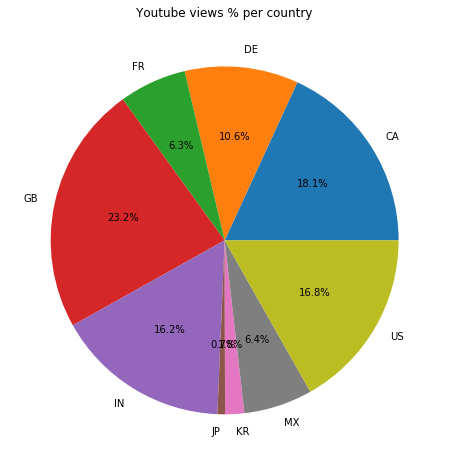

In [8]:
df_temp = data.reset_index().sort_values('trending_date')

labels = df_temp.groupby(['country']).count().index
#sizes = df_temp.groupby(['country']).count()['views']
sizes = df_temp[['views','country']].groupby('country').sum()
fig, ax = plt.subplots(figsize=(8,8))
ax.pie(sizes, labels=labels, labeldistance=1.1, autopct='%1.1f%%',shadow=False)
plt.title("Youtube views % per country", fontsize=12)
plt.show()

In [73]:
data_corr = data
data_corr['video_title_count_word'] = data['title'].apply(lambda x: len(str(x).split()))
data_corr['video_tags_count_word'] = data["tags"].apply(lambda x: len(str(x).split()))
#Unique word count
data_corr['count_unique_word']=data["title"].apply(lambda x: len(set(str(x).split())))
data_corr['count_unique_word_tags']=data["tags"].apply(lambda x: len(set(str(x).split())))
data_corr["video_title_count_punctuations"] = data["title"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
data_corr["video_tag_count_punctuations"] =data["tags"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

data_corr["video_title_count_words_upper"] = data["title"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))
data_corr["video_tag_count_words_upper"] = data["tags"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))
data_corr["video_title_count_words_title"] = data["title"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))
data_corr["video_tage_count_words_title"] = data["tags"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

data_corr['cahnnel_title_len'] = data['channel_title'].apply(lambda x: len(str(x).split()))


C:\Users\EliEm\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\EliEm\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\EliEm\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

### The following correlation matrix has diplayed between "Views", "Likes", "Dislikes" and "Comment_count". There is strong correlation "Likes" and "Views", so we can conclude if the video get more positove feedback by "Like", there is more chance to be viewed more.


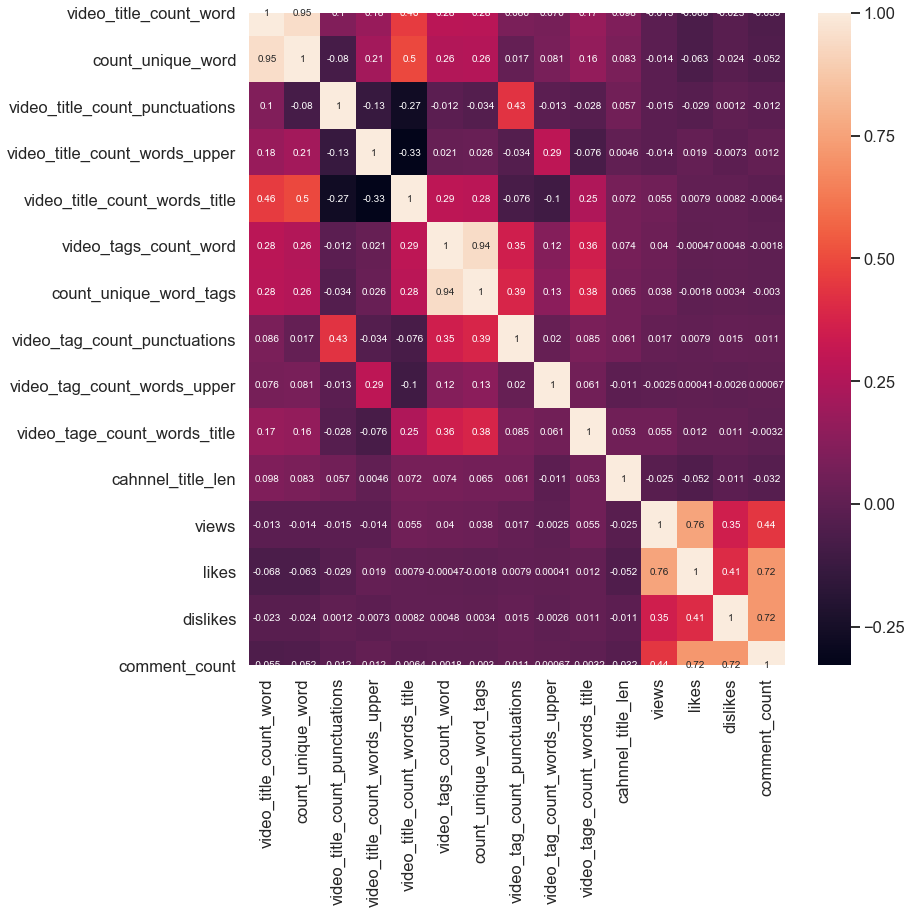

In [75]:
plt.figure(figsize = (12,12))

sns.heatmap(data_corr[['video_title_count_word', 'count_unique_word', 'video_title_count_punctuations',
                       "video_title_count_words_upper",'video_title_count_words_title',
                       'video_tags_count_word','count_unique_word_tags' ,
                     "video_tag_count_punctuations", "video_tag_count_words_upper", 
                      'video_tage_count_words_title','cahnnel_title_len',
                     'ratings_disabled', 'comments_disabled', 'video_error_or_removed',
                      'views','likes', 'dislikes', 'comment_count']].corr(), annot=True)
plt.show()

### Scatter plot for Likes and Views

- The scatter plot between "views" attribute and "likes", "dislikes" and "comment_count" has displayed as following groupped by each country. We can see the correlation between "views" and "likes" are more than correlation between"views" and "dislikes" and also correlation between "views" and "comment_counts".

### - Scatter plot for "views" vs "Likes"

C:\Users\EliEm\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


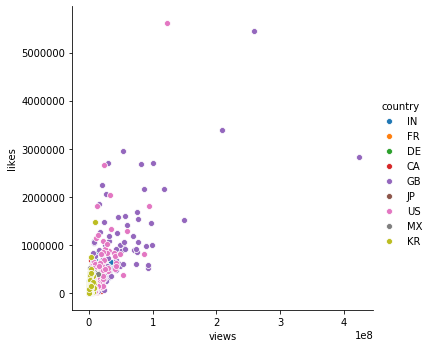

In [11]:
sns.pairplot(x_vars=['views'], y_vars=['likes'], data=data, hue="country", size=5)

### - Scatter plot for "views" vs "comment_count"

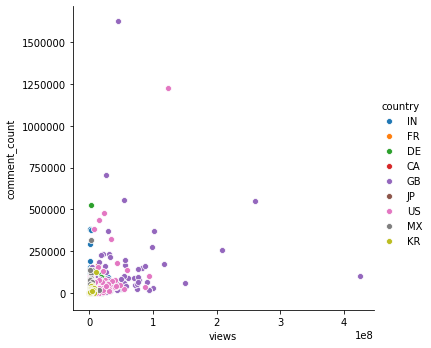

In [12]:
sns.pairplot(x_vars=['views'], y_vars=['comment_count'], data=data, hue="country", size=5)

### - Scatter plot for "views" vs "dislikes"

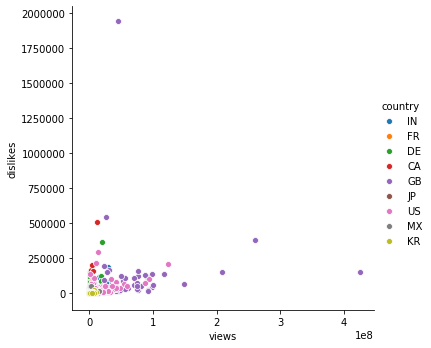

In [13]:
sns.pairplot(x_vars=['views'], y_vars=['dislikes'], data=data, hue="country", size=5)

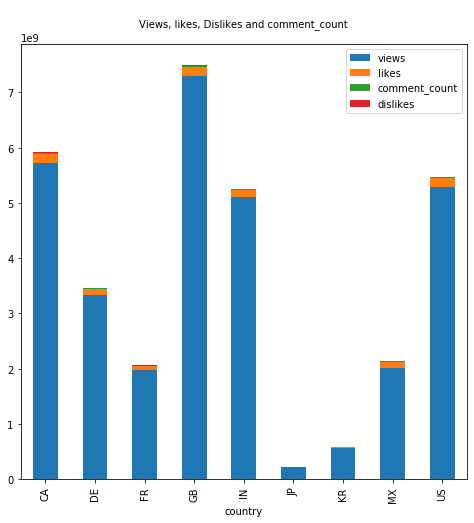

In [14]:
list = data[["country", "views", "likes", "comment_count", "dislikes"]].groupby("country").sum()
title = "\nViews, likes, Dislikes and comment_count\n"

list.plot.bar(stacked=True, figsize=(8,8))
plt.title(title, fontsize=10)
plt.legend( fontsize  = 10)
plt.show()

### The best 20 videos viewed on Youtube

- The top viewed videos have been displayed in the following bar chart with the number visits.

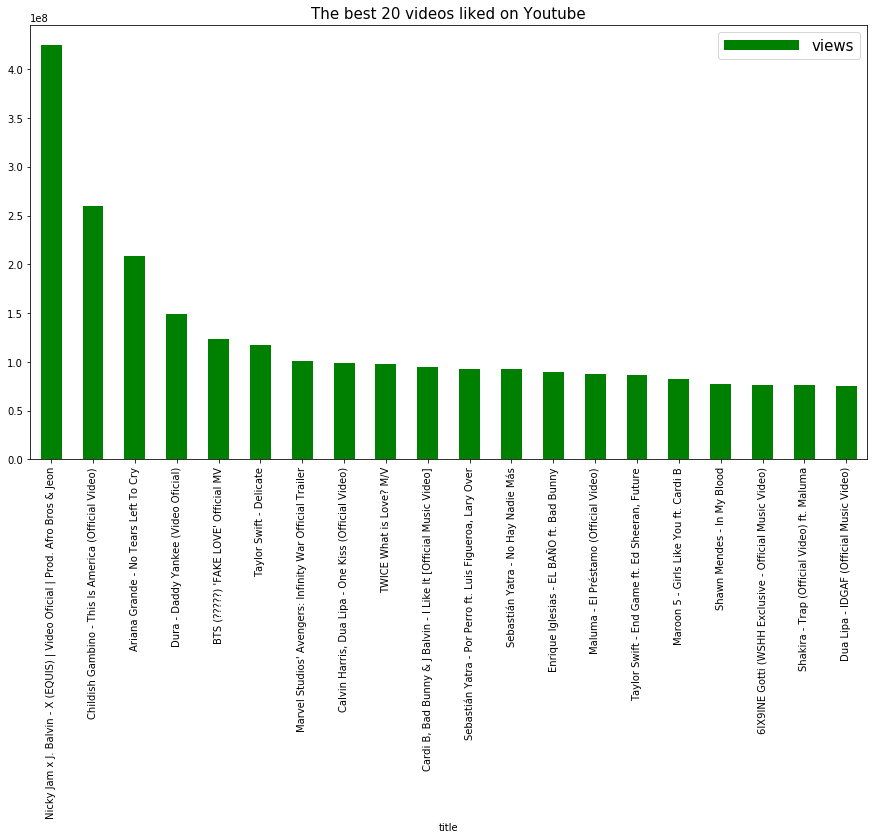

In [15]:
list = data[["title","views"]].sort_values(by="views",ascending=True)

list.sort_values(by="views",ascending=False).set_index("title").head(20).plot.bar(figsize=(15,8), color = 'g')
plt.title("The best 20 videos liked on Youtube", fontsize=15)
plt.legend(handlelength=5, fontsize  = 15)
plt.show()

### The best 20 videos have been liked on Youtube

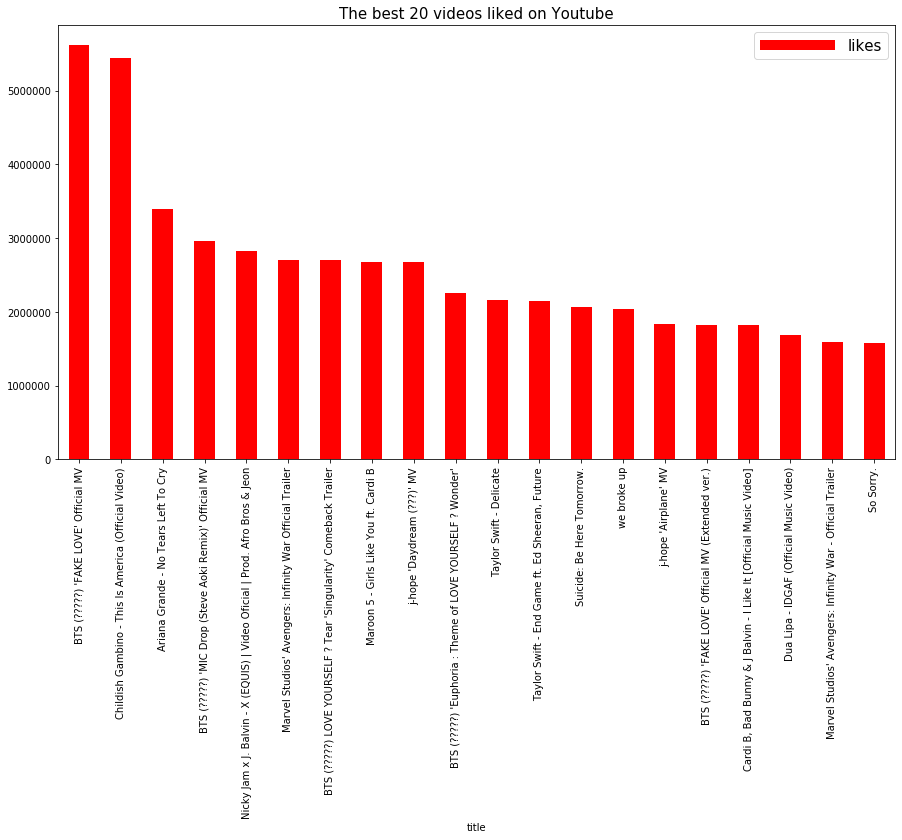

In [16]:
list = data[["title","likes"]].sort_values(by="likes",ascending=True)

list.sort_values(by="likes",ascending=False).set_index("title").head(20).plot.bar(figsize=(15,8), color = 'r')
plt.title("The best 20 videos liked on Youtube", fontsize=15)
plt.legend(handlelength=5, fontsize  = 15)
plt.show()

### The best 20 Entertaintment videos on Youtube

C:\Users\EliEm\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 146 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\EliEm\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 146 missing from current font.
  font.set_text(s, 0, flags=flags)


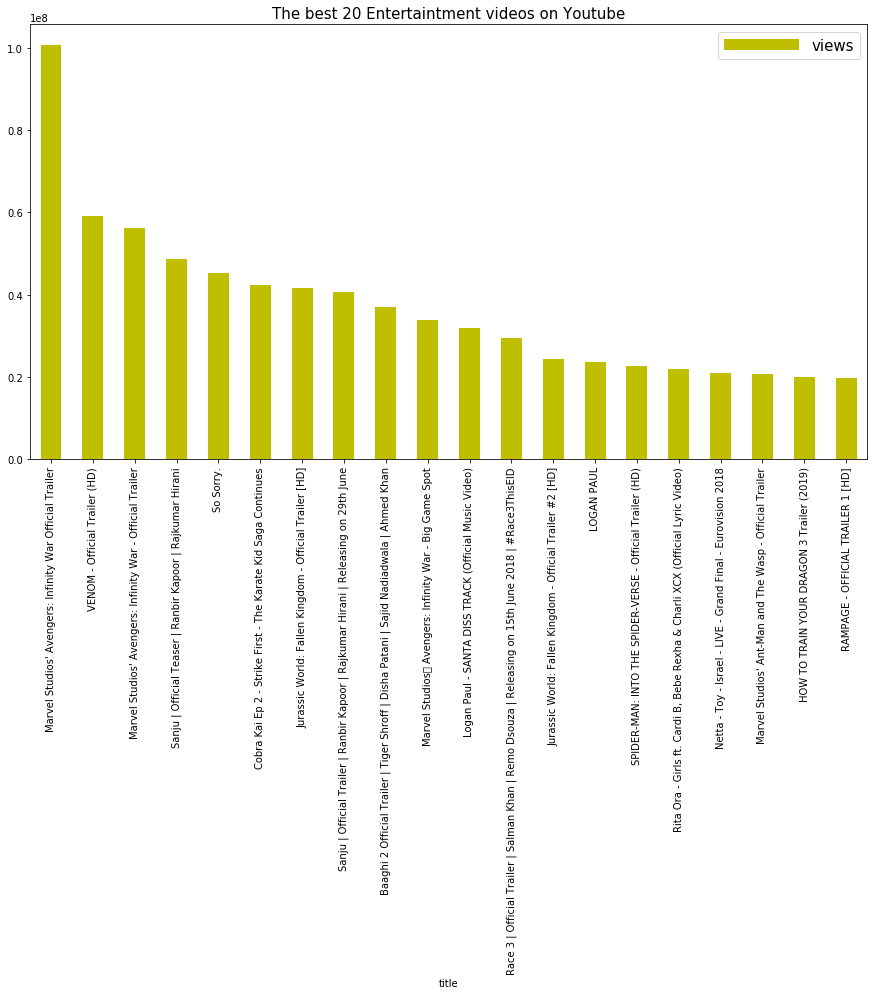

In [17]:
list = data[data["category"] == "Entertainment"][["title","views"]].sort_values(by="views",ascending=True)


list.sort_values(by="views",ascending=False).set_index("title").head(20).plot.bar(figsize=(15,8), color = 'y')
plt.title("The best 20 Entertaintment videos on Youtube", fontsize=15)
plt.legend(handlelength=5, fontsize  = 15)
plt.show()

In [18]:
data['trending_date_dt'] = pd.to_datetime(data['trending_date'],errors='coerce')
data["trending_date_month"]= data["trending_date_dt"].dt.strftime("%B")
data["trending_date_month_num"]= data["trending_date_dt"].dt.month
data["trending_date_day"]= data["trending_date_dt"].dt.strftime("%A")
data["trending_date_year"]= data["trending_date_dt"].dt.year

C:\Users\EliEm\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\EliEm\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\EliEm\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

### The youtube trending date in Canada

- Based on following graph that shows the trending date of videos in Canada, we can see the number of views have been increased over the pas few months in the last year.

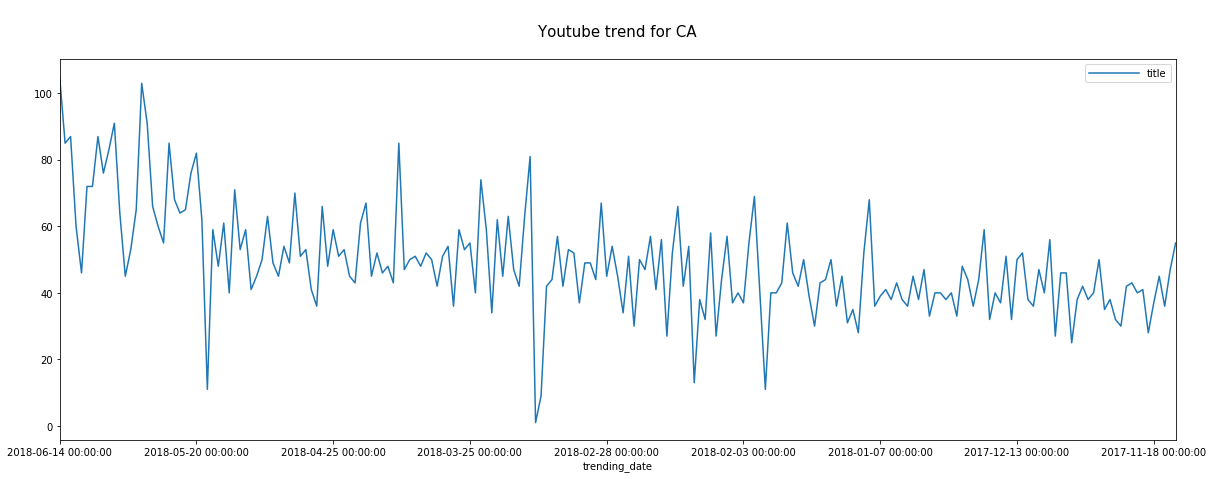

In [19]:
country = "CA"
data[data["country"] == country][["title", "trending_date"]].groupby("trending_date").count().sort_index(ascending=False).plot.line(figsize=(20,7))

plt.title("\nYoutube trend for "+ country +"\n", fontsize=15)
plt.legend(handlelength=5, fontsize  = 10)
plt.show()


- The following bar graph depicts that the videoes have been watched in Canada mostly in May 2018 and this number has dropped in June 2018.

C:\Users\EliEm\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  This is separate from the ipykernel package so we can avoid doing imports until


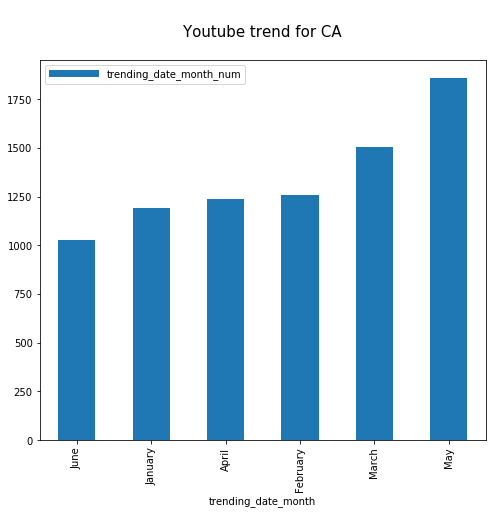

In [20]:
country = "CA"
data_canada = data[data["country"] == country]
data_canada[data_canada["trending_date_year"] == 2018 ][["trending_date_month", "trending_date_month_num"]].groupby(["trending_date_month"]).count().sort_index(by = "trending_date_month_num").plot.bar(figsize=(8,7))
#.plot.kde(figsize=(12,10))

plt.title("\nYoutube trend for "+ country +"\n", fontsize=15)
plt.legend(handlelength=5, fontsize  = 10)
plt.show()


- The below grpah shows that YouTube videos have been visited mostly in Tuesday and Thursday in Canada based on the data for first six months of 2018 and year of 2017.

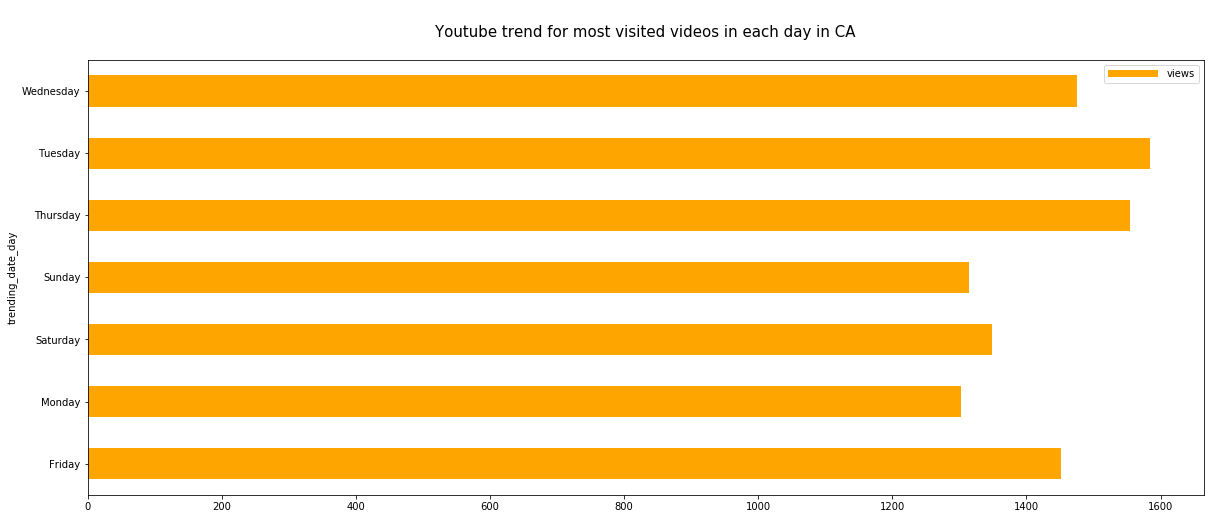

In [21]:
country = "CA"
data[data["country"] == country][["views", "trending_date_day"]].groupby("trending_date_day").count().plot.barh(figsize=(20,8), color= "orange")

plt.title("\nYoutube trend for most visited videos in each day in "+ country +"\n", fontsize=15)
plt.legend(handlelength=5, fontsize  = 10)
plt.show()


The number of top trending videos have been increased dramatically in May and June of 2018.

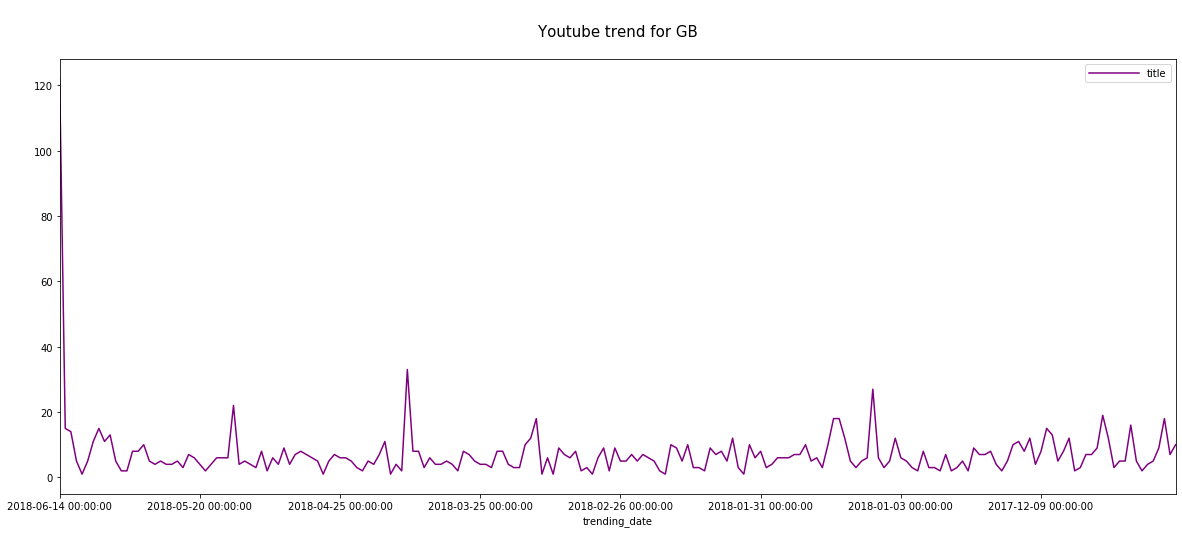

In [22]:
country = "GB"
data[data["country"] == country][["title", "trending_date"]].groupby("trending_date").count().sort_index(ascending=False).plot.line(figsize=(20,8), color = "purple")
#.plot.kde(figsize=(12,10))

plt.title("\nYoutube trend for "+ country +"\n", fontsize=15)
plt.legend(handlelength=5, fontsize  = 10)
plt.show()

### Youtube trend for most visited videos in each months in the first half year of 2018 in India

C:\Users\EliEm\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  This is separate from the ipykernel package so we can avoid doing imports until


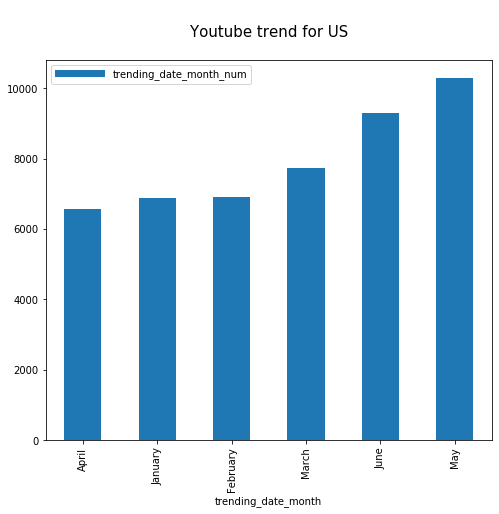

In [23]:
country = "US"
data_canada = data[data["country"] == country]
data[data["trending_date_year"] == 2018 ][["trending_date_month", "trending_date_month_num"]].groupby(["trending_date_month"]).count().sort_index(by = "trending_date_month_num").plot.bar(figsize=(8,7))
#.plot.kde(figsize=(12,10))

plt.title("\nYoutube trend for "+ country +"\n", fontsize=15)
plt.legend(handlelength=5, fontsize  = 10)
plt.show()


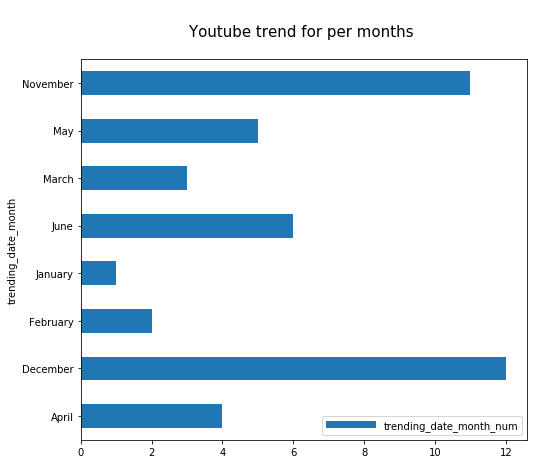

In [24]:

data[["trending_date_month", "trending_date_month_num"]].groupby(["trending_date_month"]).mean().plot.barh(figsize=(8,7))
#.plot.kde(figsize=(12,10))

plt.title("\nYoutube trend for per months \n", fontsize=15)
plt.legend(handlelength=5, fontsize  = 10)
plt.show()


### Youtube trend for most visited videos in each day in Denamrk

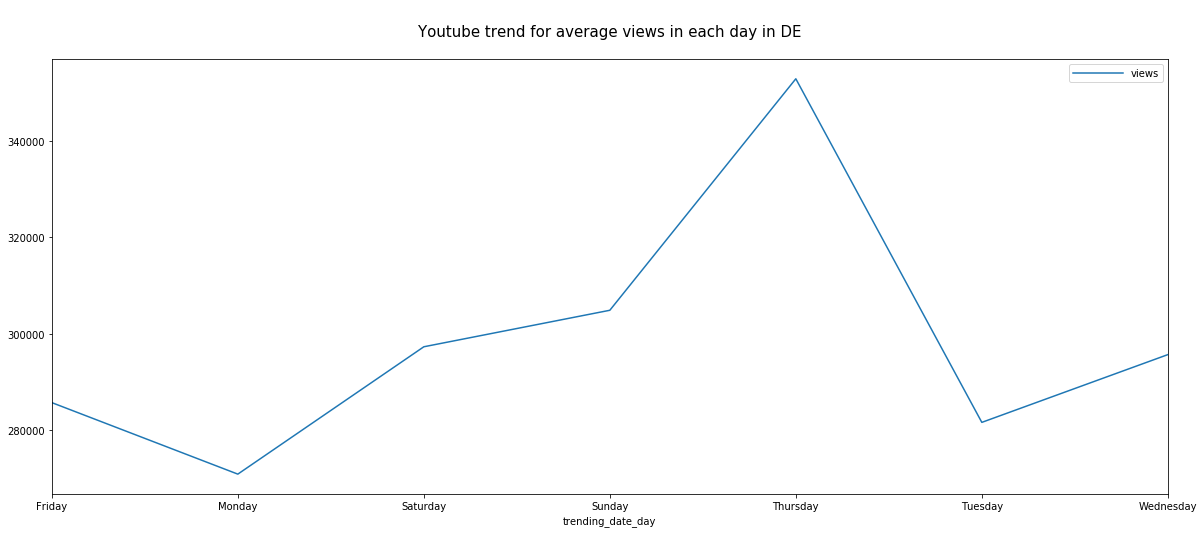

In [25]:
country = "DE"
data[data["country"] == country][["views", "trending_date_day"]].groupby("trending_date_day").mean().plot.line(figsize=(20,8))

plt.title("\nYoutube trend for average views in each day in "+ country +"\n", fontsize=15)
plt.legend(handlelength=5, fontsize  = 10)
plt.show()


Text(0.5, 1.0, '\nYoutube trend for average views in each day in CA\n')

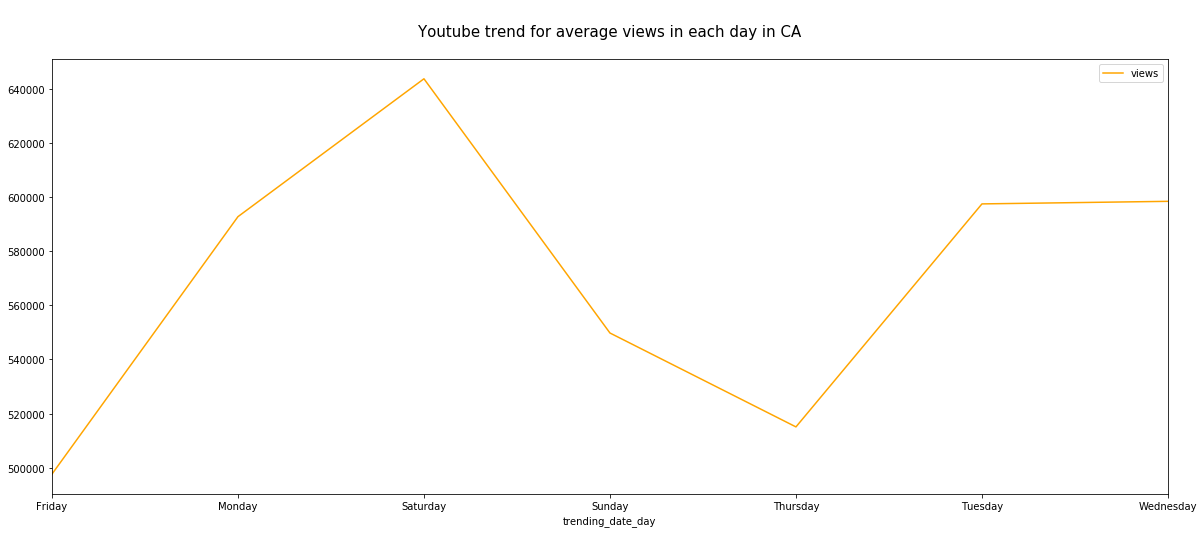

In [26]:
country = "CA"
data[data["country"] == country][["views", "trending_date_day"]].groupby("trending_date_day").mean().plot.line(figsize=(20,8), color= "orange")
plt.title("\nYoutube trend for average views in each day in "+ country +"\n", fontsize=15)

Text(0.5, 1.0, '\nYoutube trend for average views in each day in US\n')

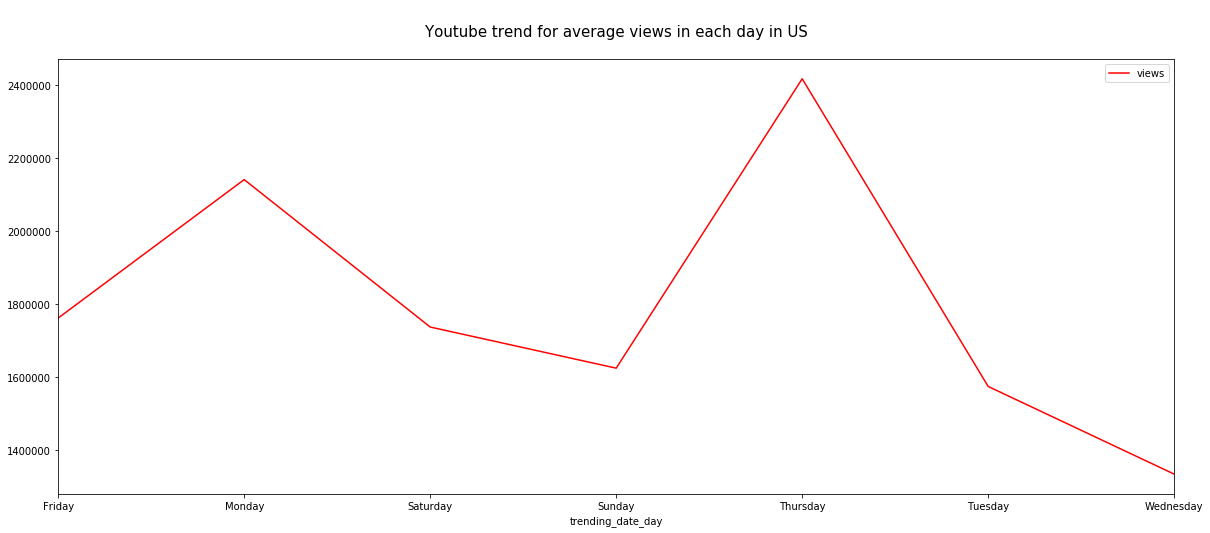

In [27]:
country = "US"
data[data["country"] == country][["views", "trending_date_day"]].groupby("trending_date_day").mean().plot.line(figsize=(20,8), color= "red")
plt.title("\nYoutube trend for average views in each day in "+ country +"\n", fontsize=15)

- The following graph shows Youtube trend for most visited videos in each day for each country. As per graph, most of videos in these countries have been watch on Tuesdays, Thursdays or Wednesdays.

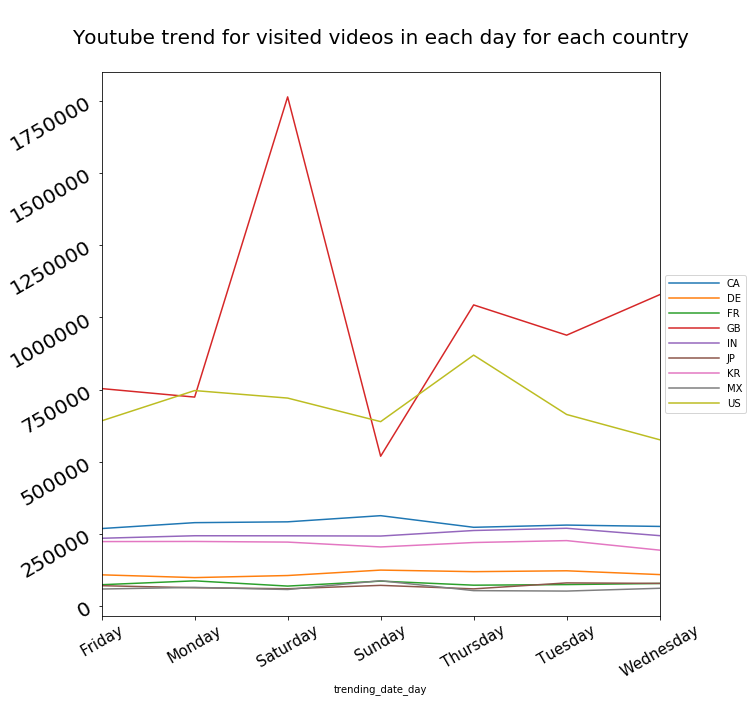

In [28]:
data.groupby(["trending_date_day","country"]).median()["views"].unstack().plot.line(figsize=(10,10))
plt.yticks(rotation=30, fontsize=20) 
plt.xticks(rotation=30, fontsize=15) 
plt.title("\nYoutube trend for visited videos in each day for each country\n", fontsize=20)
plt.legend(handlelength=5, fontsize  = 10, loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [29]:
data[data["country"] == country][["views", "trending_date_day"]].groupby("trending_date_day").count().sort_values(by="views")

,views
trending_date_day,
Saturday,321
Sunday,342
Friday,352
Monday,392
Wednesday,438
Tuesday,476
Thursday,575


In [30]:
bad_channel_title=data[data["channel_title"]=="???????? ?????"].index

In [31]:
data.shape

(58770, 37)

In [32]:
data=data.drop(bad_channel_title)

In [33]:
data.shape

(58603, 37)

### Top 25 Channels

- Top 25 Youtube video channel that have been watched mostly have been represented in following graph.

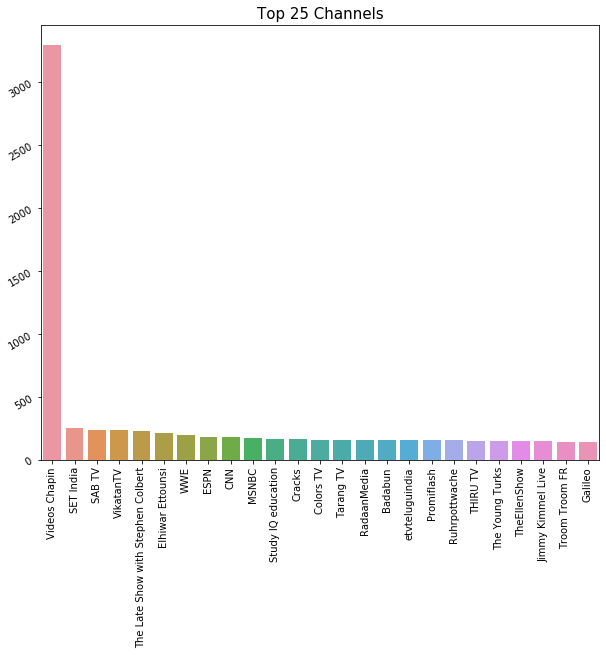

In [34]:
x = data.channel_title.value_counts().head(25).index
y = data.channel_title.value_counts().head(25).values
title = "Top 25 Channels"
plt.figure(figsize = (10,8))
sns.barplot(x = x, y = y )
plt.title(title , fontsize=15)
plt.yticks(rotation=30, fontsize=10) 
plt.xticks(rotation=90, fontsize=10) 
plt.xticks(rotation = 90)
plt.show()

- The below bar chart shows that if the video has entertainment content, then there is more chance to be watched more. News, Sport and Blogs videos are following entertainment.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000020D375293C8>],
      dtype=object)

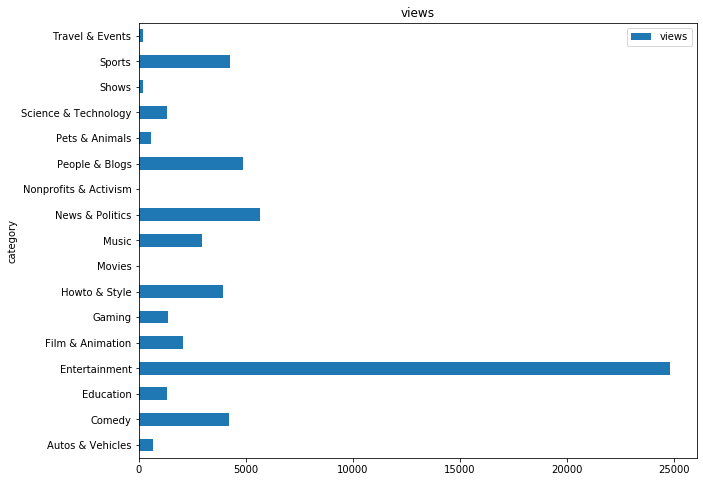

In [35]:
data[["views", "category"]].groupby("category").count().plot.barh(figsize=(10,8),subplots=True )

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000020D37AFE408>],
      dtype=object)

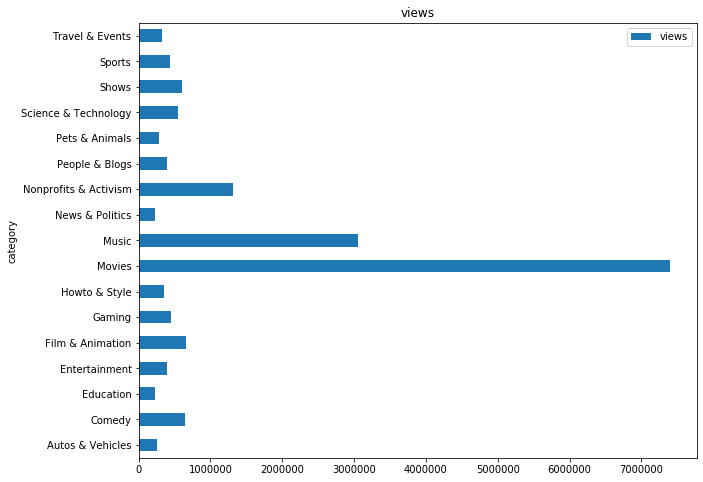

In [36]:
data[["views", "category"]].groupby("category").mean().plot.barh(figsize=(10,8),subplots=True )

### Different category of videos from different Country

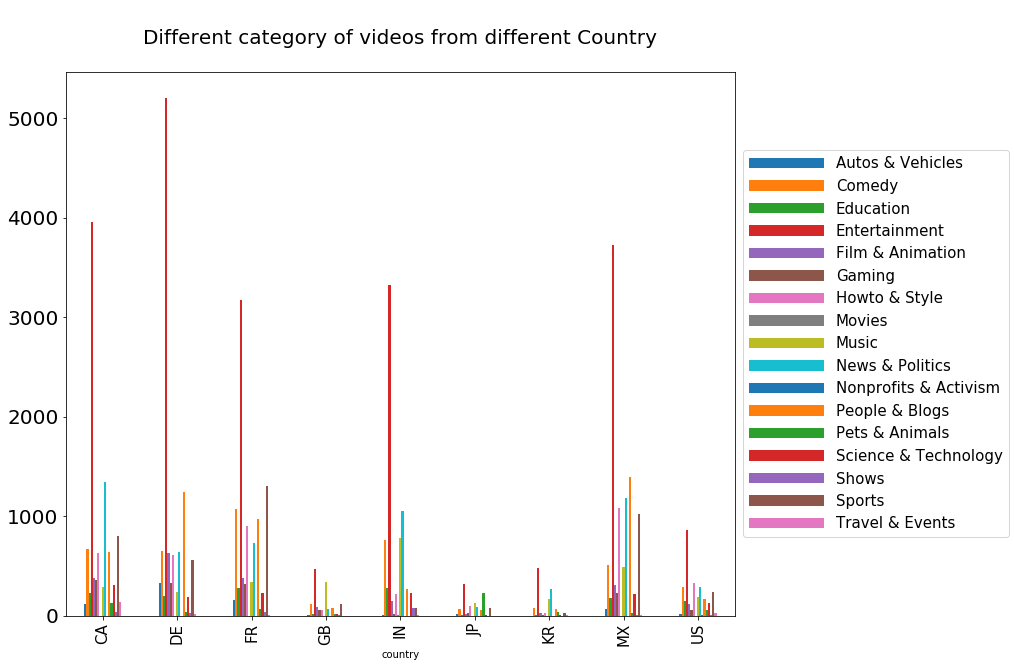

In [37]:
data.groupby(["country", "category"]).count()["video_id"].unstack().plot.bar(figsize=(12,10))
plt.yticks( fontsize=20) 
plt.xticks( fontsize=15) 
plt.title("\nDifferent category of videos from different Country\n", fontsize=20)
plt.legend(handlelength=5, fontsize  = 15, loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

### Different category of videos from different Country - Median

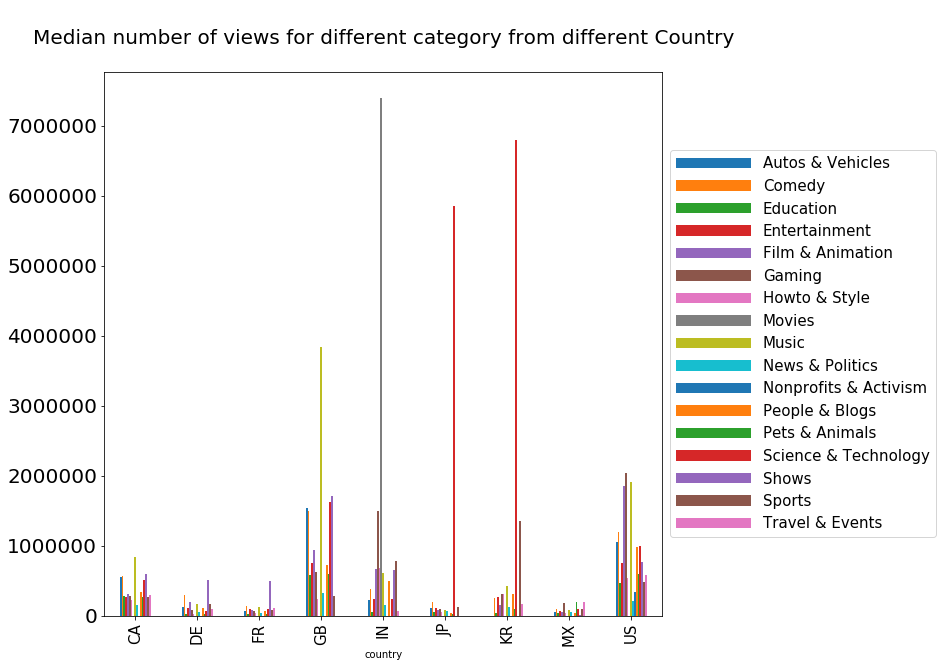

In [38]:
data.groupby(["country","category"]).median()["views"].unstack().plot.bar(figsize=(10,10))
plt.yticks( fontsize=20) 
plt.xticks( fontsize=15) 
plt.title("\nMedian number of views for different category from different Country\n", fontsize=20)
plt.legend(handlelength=5, fontsize  = 15, loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

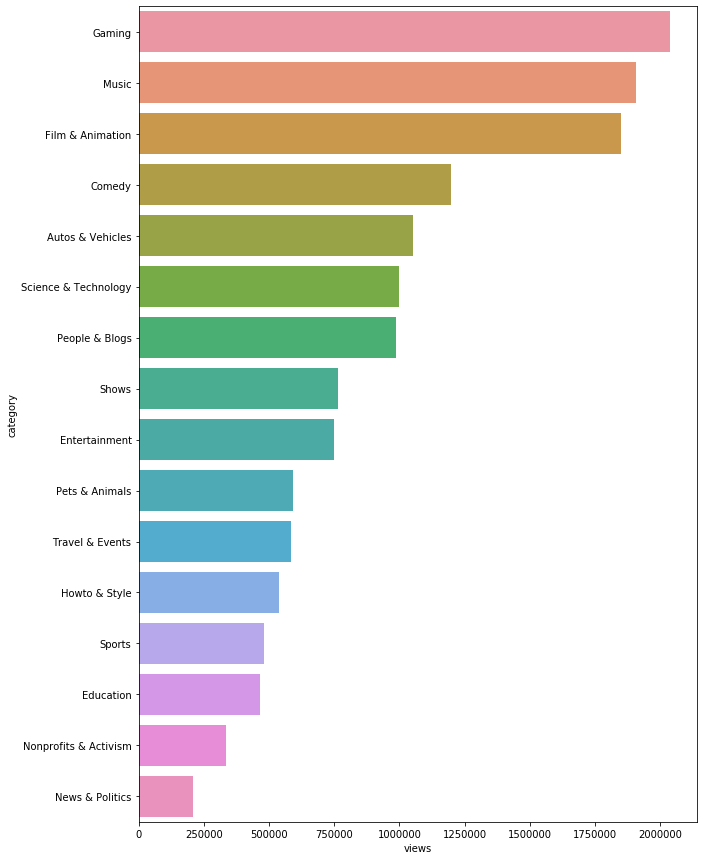

In [39]:
us_data = data [data["country"]=="US"]
views_us_category = us_data.groupby('category').median()['views'] 
views_us_category = views_us_category.sort_values(ascending=False).reset_index()
views_us_category.columns = ['category','views']
plt.subplots(figsize=(10, 15))
sns.barplot(x="views", y="category", data=views_us_category,
            label="Views-Comments Ratio")

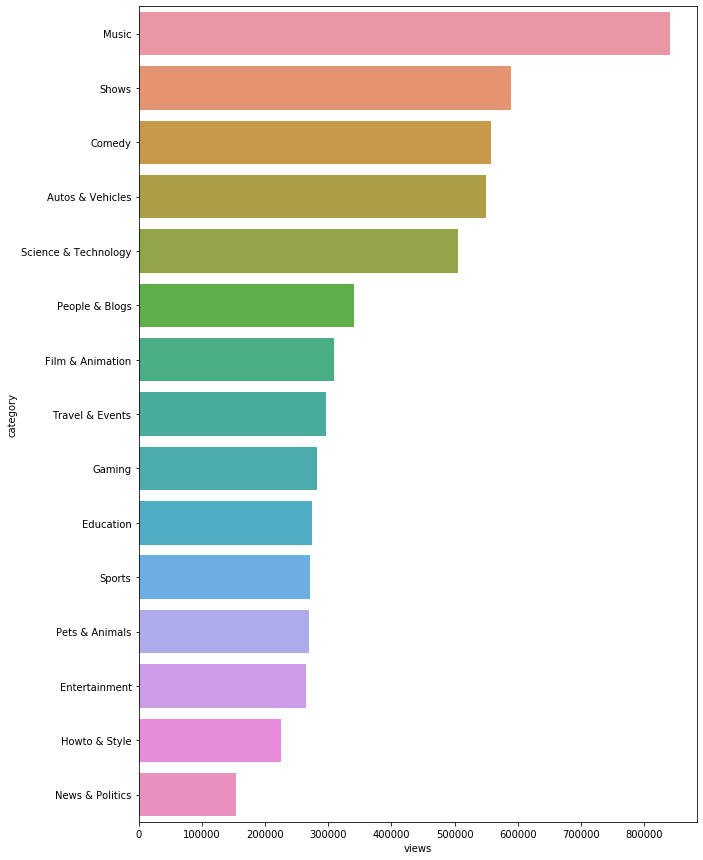

In [40]:
ca_data = data [data["country"]=="CA"]
views_ca_category = ca_data.groupby('category').median()['views'] 
views_ca_category = views_ca_category.sort_values(ascending=False).reset_index()
views_ca_category.columns = ['category','views']
plt.subplots(figsize=(10, 15))
sns.barplot(x="views", y="category", data=views_ca_category,
            label="Views-Comments Ratio")

### Views-Comments Ratio

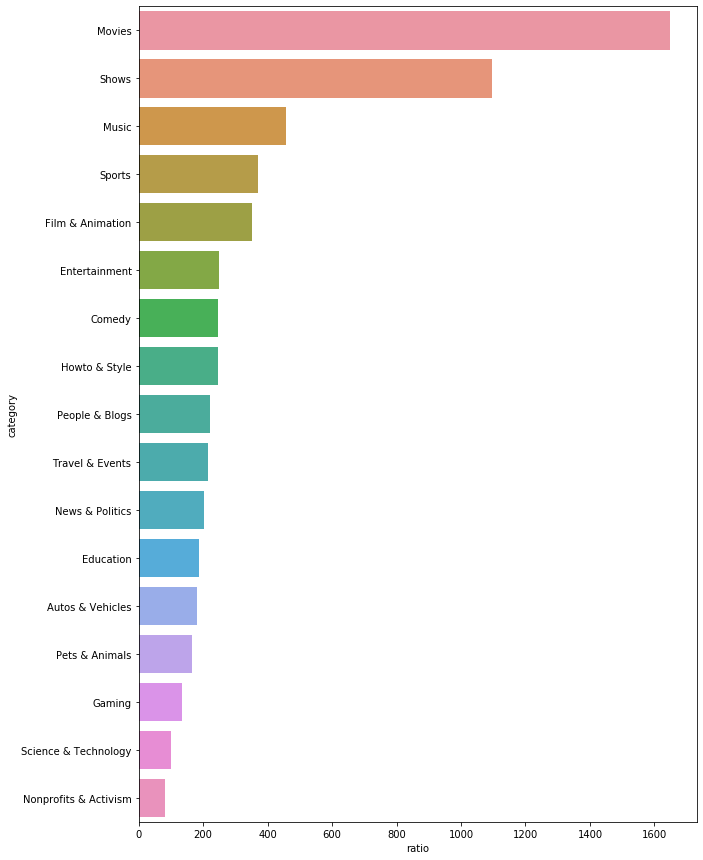

In [41]:
views_comment_ratio = data.groupby('category')['views'].agg('sum') / data.groupby('category')['comment_count'].agg('sum')
views_comment_ratio = views_comment_ratio.sort_values(ascending=False).reset_index()
views_comment_ratio.columns = ['category','ratio']
plt.subplots(figsize=(10, 15))
sns.barplot(x="ratio", y="category", data=views_comment_ratio,
            label="Views-Comments Ratio")

In [42]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\EliEm\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [10]:
from wordcloud import WordCloud
import nltk
#nltk.download()
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
from nltk.tokenize import RegexpTokenizer
import re

In [11]:
category_list =data['category'].unique().tolist()

MAX_N = 1000

#remove all the stopwords from the text
en_stopwords = list(stopwords.words('english'))
de_stopwords = list(stopwords.words('german'))   
fr_stopwords = list(stopwords.words('french'))   
en_stopwords.extend(de_stopwords)
en_stopwords.extend(fr_stopwords)

polarities = list()

Text(0.5, 1.0, 'Polarity of Categories in Youtube videos')

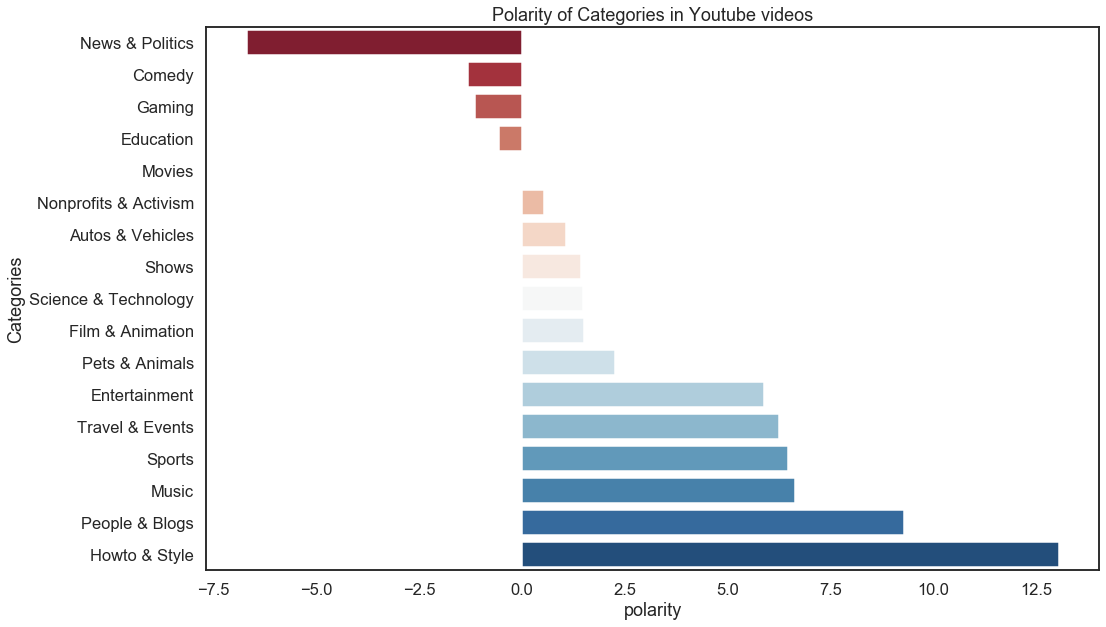

In [12]:
for cate in category_list:
    tags_word = data[data['category']==cate]['title'].str.lower().str.cat(sep=' ')

# removes punctuation,numbers and returns list of words
    tags_word = re.sub('[^A-Za-z]+', ' ', tags_word)
    word_tokens = word_tokenize(tags_word)
    filtered_sentence = [w for w in word_tokens if not w in en_stopwords]
    without_single_chr = [word for word in filtered_sentence if len(word) > 2]

# Remove numbers
    cleaned_data_title = [word for word in without_single_chr if not word.isdigit()]      
    
# Calculate frequency distribution
    word_dist = nltk.FreqDist(cleaned_data_title)
    hnhk = pd.DataFrame(word_dist.most_common(MAX_N),
                    columns=['Word', 'Frequency'])

    compound = .0
    for word in hnhk['Word'].head(MAX_N):
        compound += SentimentIntensityAnalyzer().polarity_scores(word)['compound']

    polarities.append(compound)

category_list = pd.DataFrame(category_list)
polarities = pd.DataFrame(polarities)
tags_sentiment = pd.concat([category_list,polarities],axis=1)
tags_sentiment.columns = ['category','polarity']
tags_sentiment=tags_sentiment.sort_values('polarity').reset_index()

plt.figure(figsize=(16,10))
sns.set(style="white",context="talk")
ax = sns.barplot(x=tags_sentiment['polarity'],y=tags_sentiment['category'], data=tags_sentiment,orient='h',palette="RdBu")
plt.xlabel("polarity")
plt.ylabel("Categories")
plt.title("Polarity of Categories in Youtube videos")

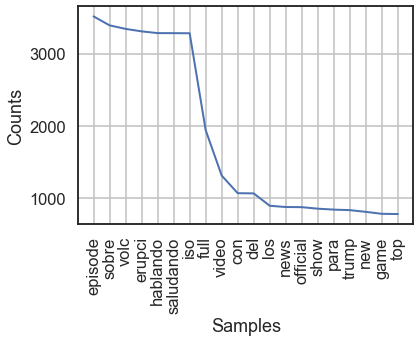

In [13]:
title_word = data['title'].str.lower().str.cat(sep=' ')

# removes punctuation,numbers and returns list of words
title_word = re.sub('[^A-Za-z]+', ' ', title_word)
word_tokens = word_tokenize(title_word)
filtered_sentence = [w for w in word_tokens if not w in en_stopwords]
without_single_chr = [word for word in filtered_sentence if len(word) > 2]

# Remove numbers
cleaned_data_title = [word for word in without_single_chr if not word.isdigit()]      
    
# Calculate frequency distribution
word_dist = nltk.FreqDist(cleaned_data_title)
hnhk = pd.DataFrame(word_dist.most_common(MAX_N),columns=['Word', 'Frequency'])
word_dist.plot(20,cumulative=False)

In [14]:
list_of_popular_words = hnhk[hnhk['Frequency']>100]['Word'].tolist()
df_popular_title = pd.DataFrame(columns = data.columns)

for word in list_of_popular_words:
    tmp = pd.DataFrame(columns = data.columns)
    tmp = data[data['title'].str.contains(" " +word+" ")]
    #tmp = data[re.search(r"word$", data['title'])]
    tmp['popular_word_in_title'] = word
    df_popular_title = df_popular_title.append(tmp)
    


C:\Users\EliEm\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\EliEm\Anaconda3\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001D4918A6888>],
      dtype=object)

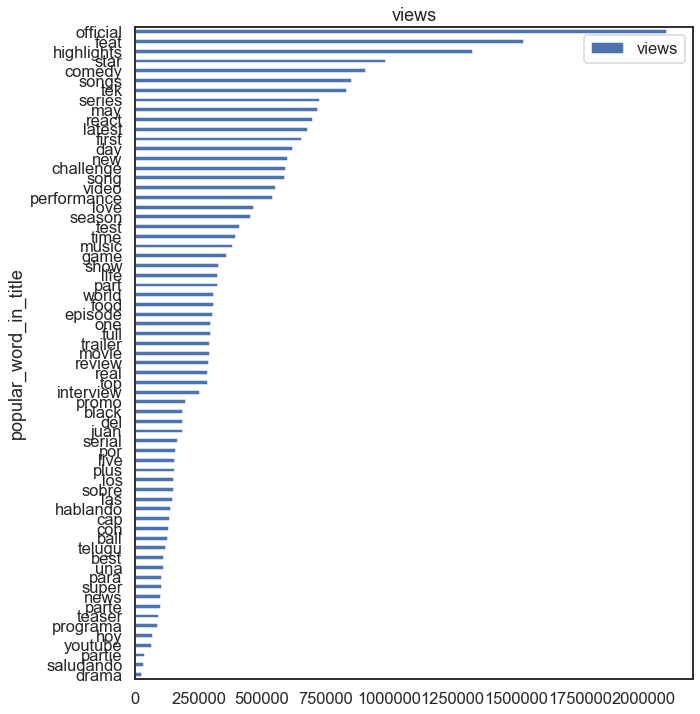

In [15]:
df_popular_title[["views", "popular_word_in_title"]].head(4000).groupby("popular_word_in_title").mean().sort_values(by = "views").plot.barh(figsize=(10,12),subplots=True )

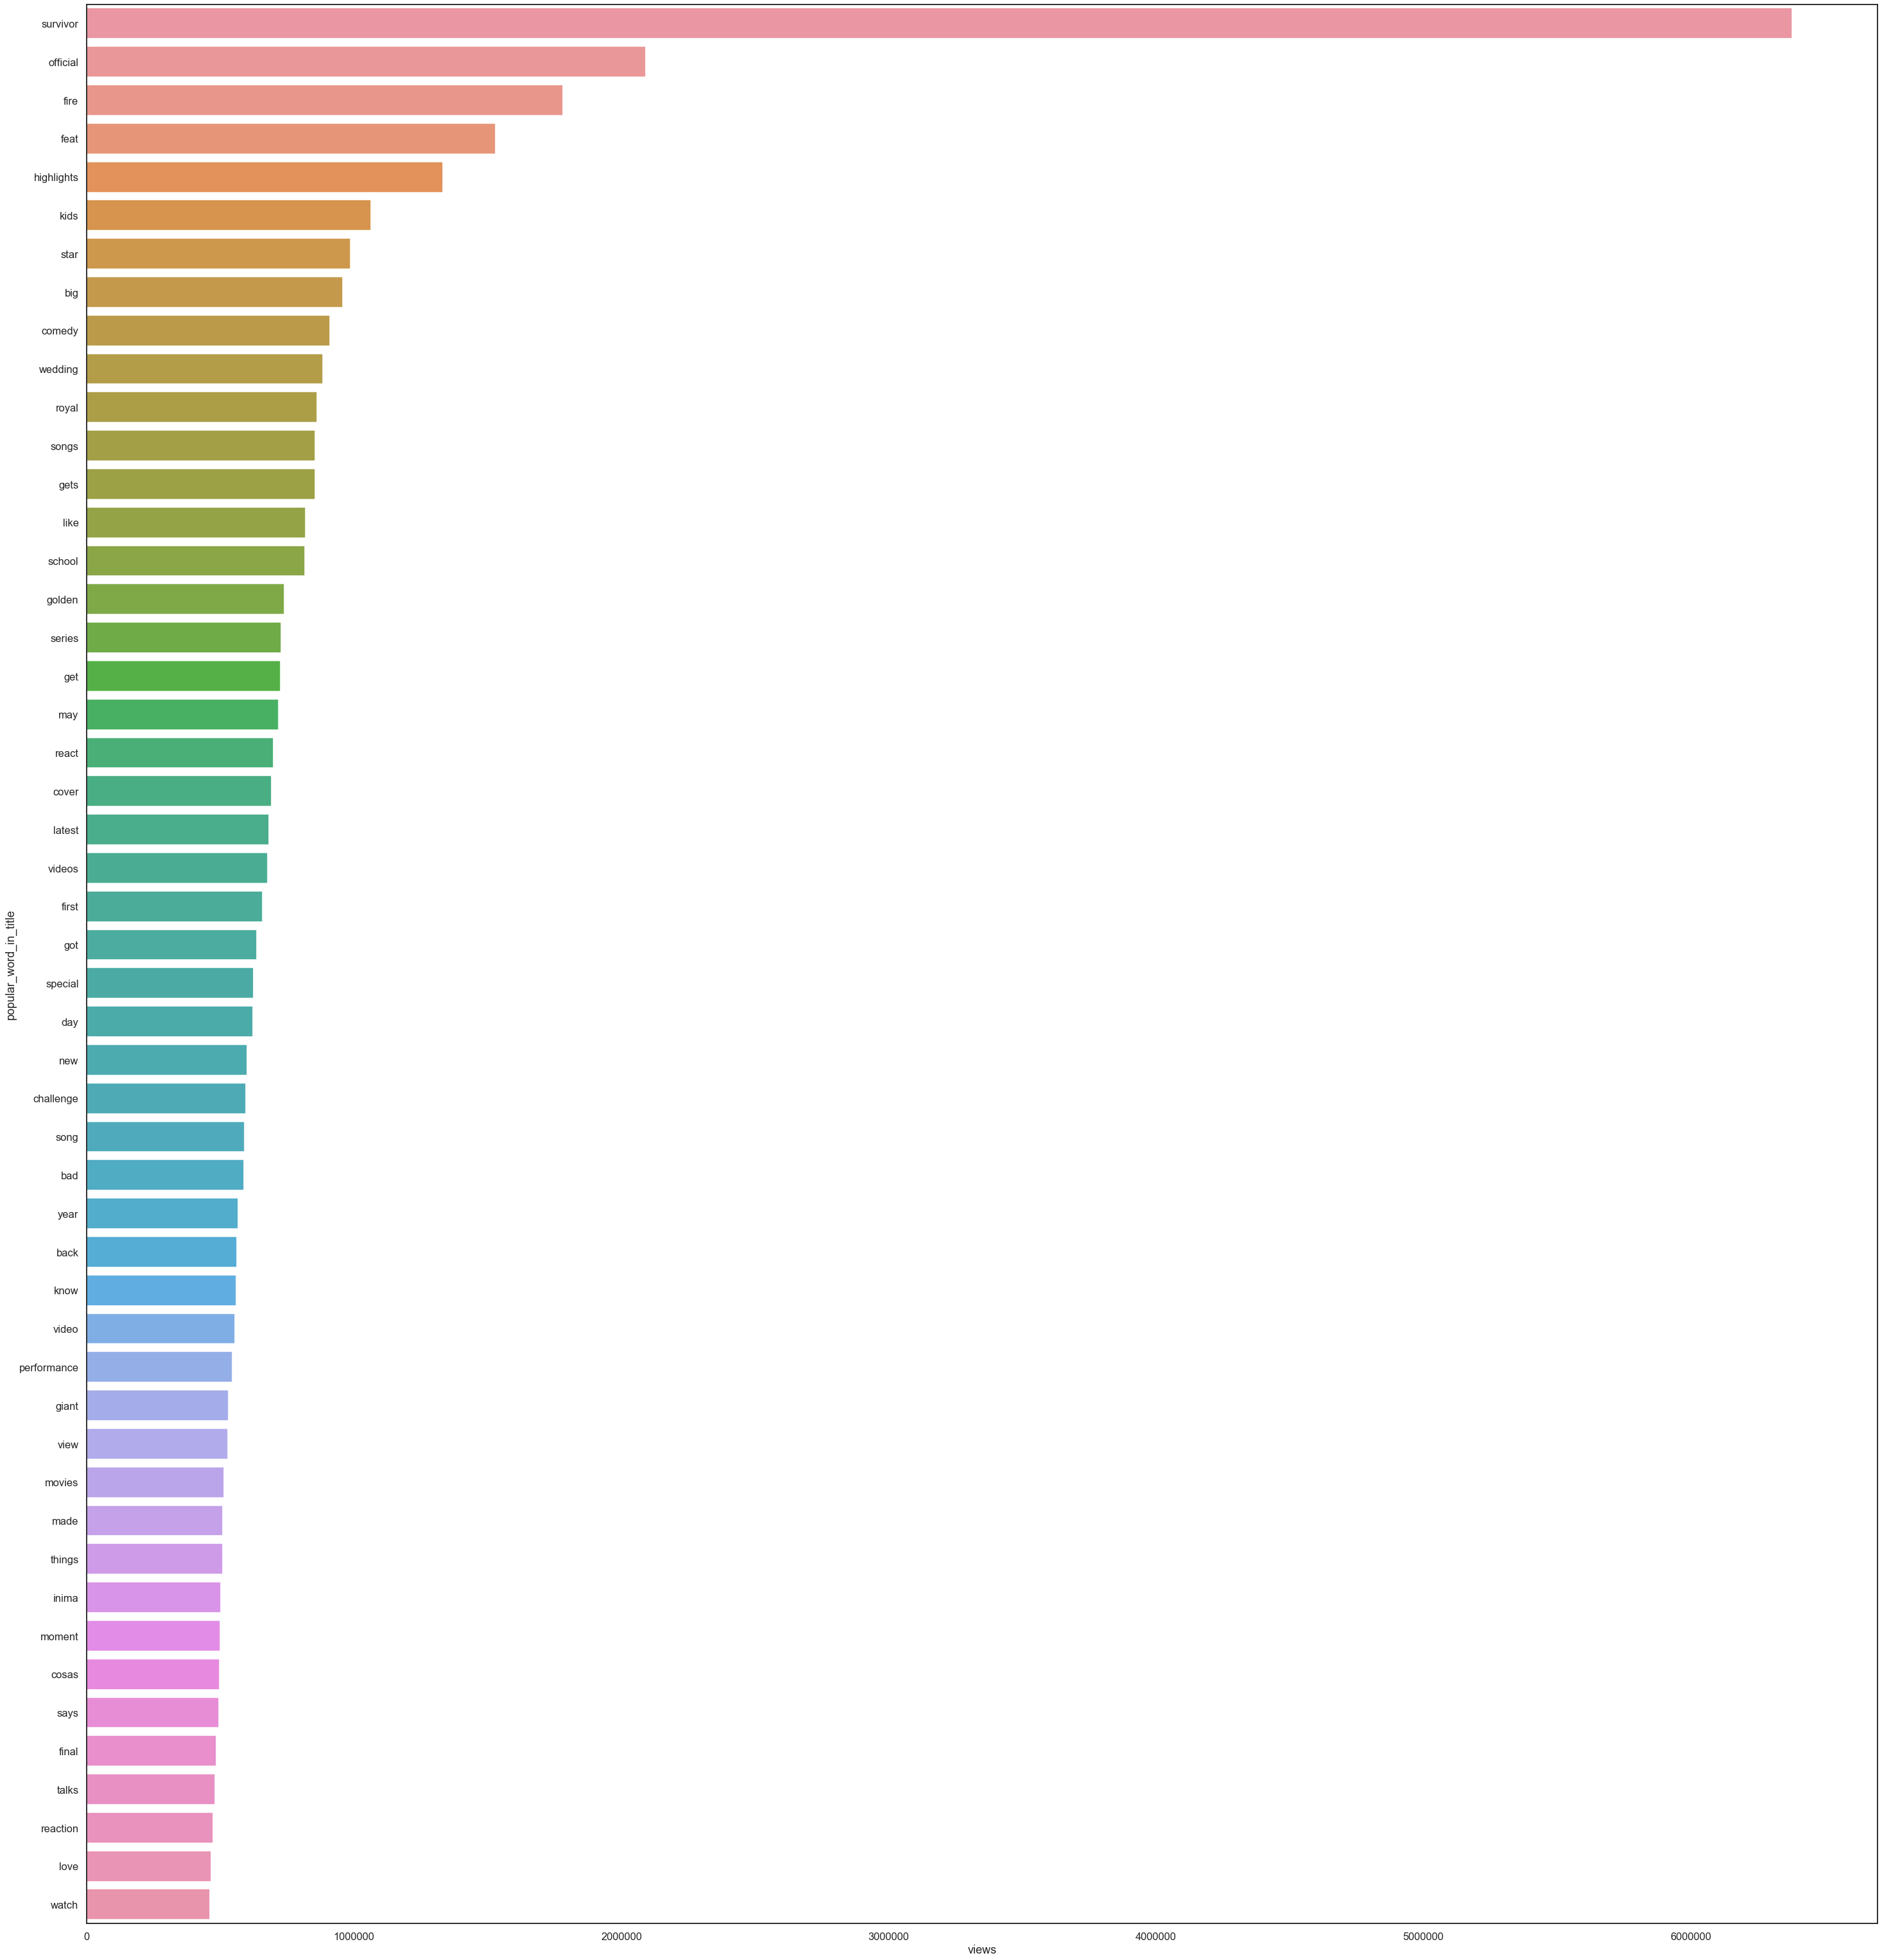

In [16]:

views_popular_title = df_popular_title.groupby('popular_word_in_title').mean()['views']
views_popular_title = views_popular_title.sort_values(ascending=False).reset_index()
views_popular_title.columns = ['popular_word_in_title','views']
plt.subplots(figsize=(50, 55))
sns.barplot(x="views", y="popular_word_in_title", data=views_popular_title.head(50),
            label="Views-popular words in video title")

In [17]:
df_popular_title[['video_id','title','views','popular_word_in_title']].to_csv('D:/DataScienceFoundation/SpringBoard/YouTube Project/youtube-new/popular_title.csv')

In [18]:
import re
from nltk import  word_tokenize
from  nltk import word_tokenize,sent_tokenize

def wcloud(data,bgcolor):
    plt.figure(figsize = (20,15))
    cloud = WordCloud(background_color = bgcolor, max_words = 100,  max_font_size = 50)
    cloud.generate(' '.join(data))
    plt.imshow(cloud)
    plt.axis('off')



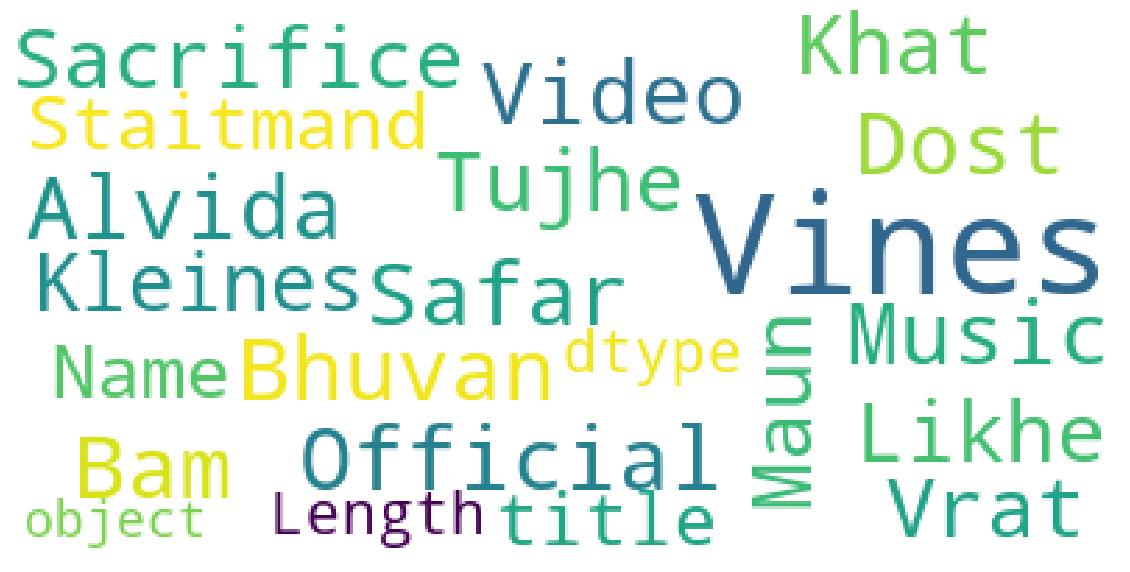

In [19]:
title_word = str(data['title'])

title_word = re.sub('[^A-Za-z]+', ' ', title_word)
word_tokens = word_tokenize(title_word)
en_stopwords = set(STOPWORDS)
filtered_sentence = [w for w in word_tokens if not w in en_stopwords]
without_single_chr = [word for word in filtered_sentence if len(word) > 2]
cleaned_data_title = [word for word in without_single_chr if not word.isdigit()]

wcloud(cleaned_data_title,'white')

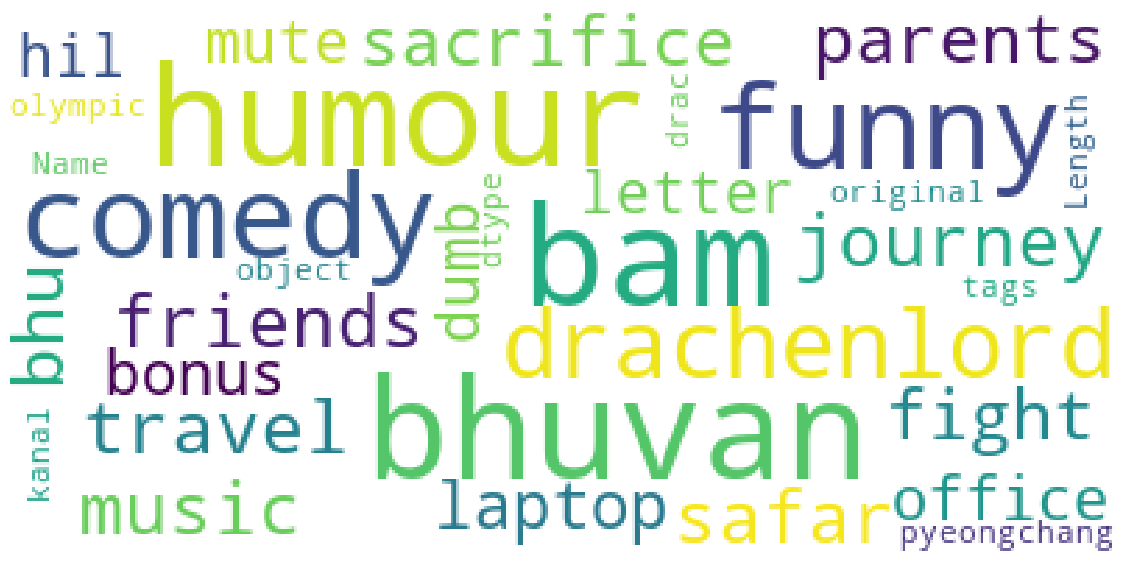

In [20]:
title_word = str(data['tags'])

title_word = re.sub('[^A-Za-z]+', ' ', title_word)
word_tokens = word_tokenize(title_word)
en_stopwords = set(STOPWORDS)
filtered_sentence = [w for w in word_tokens if not w in en_stopwords]
without_single_chr = [word for word in filtered_sentence if len(word) > 2]
cleaned_data_title = [word for word in without_single_chr if not word.isdigit()]

wcloud(cleaned_data_title,'white')

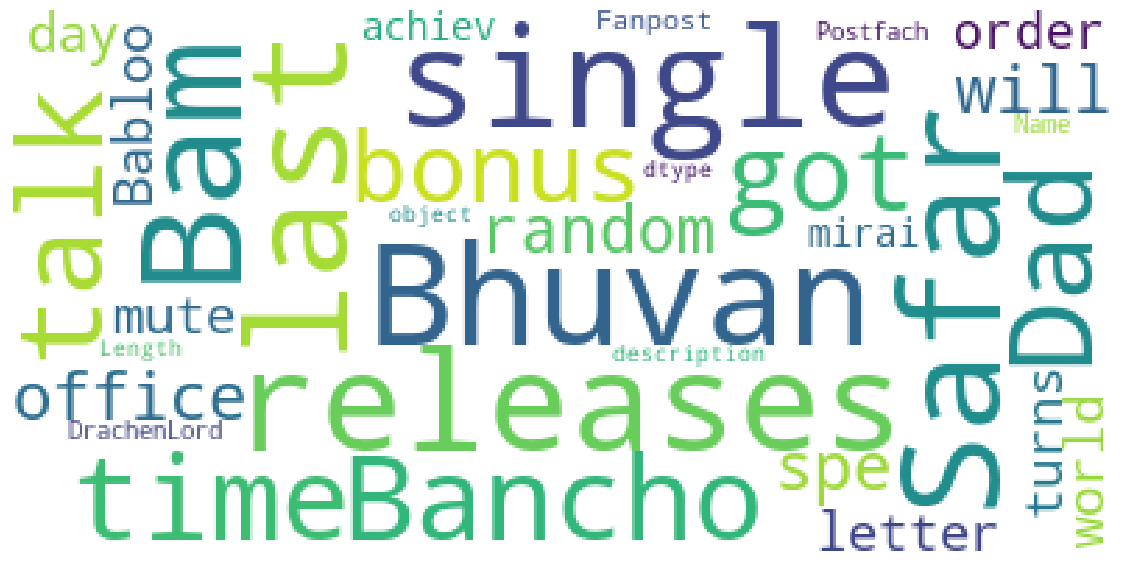

In [21]:
title_word = str(data['description'])

title_word = re.sub('[^A-Za-z]+', ' ', title_word)
word_tokens = word_tokenize(title_word)
en_stopwords = set(STOPWORDS)
filtered_sentence = [w for w in word_tokens if not w in en_stopwords]
without_single_chr = [word for word in filtered_sentence if len(word) > 2]
cleaned_data_title = [word for word in without_single_chr if not word.isdigit()]

wcloud(cleaned_data_title,'white')

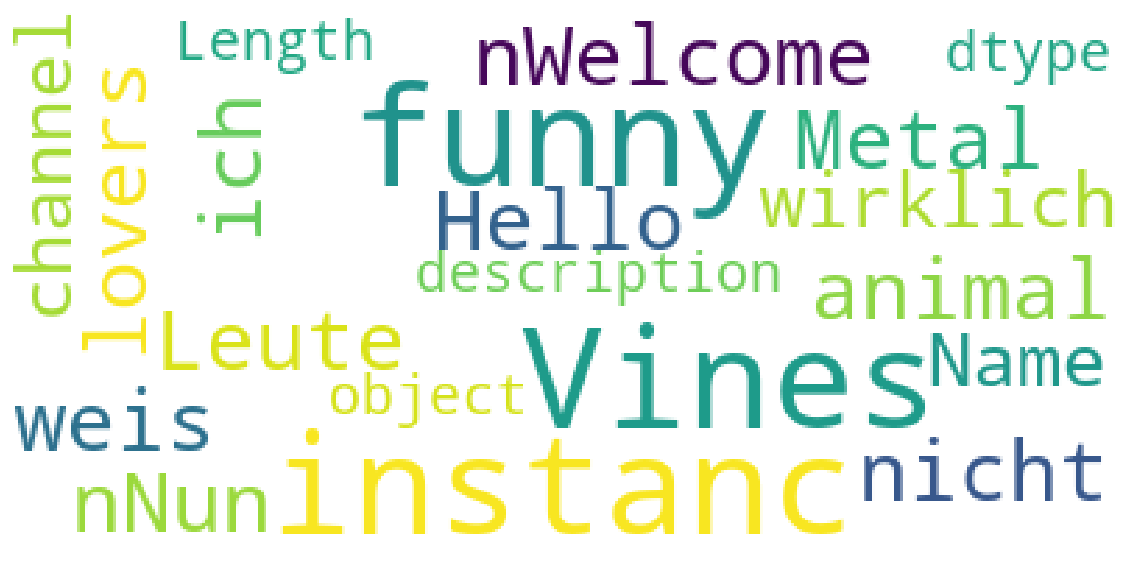

In [22]:
title_word = str(data['channel_description'])

title_word = re.sub('[^A-Za-z]+', ' ', title_word)
word_tokens = word_tokenize(title_word)
en_stopwords = set(STOPWORDS)
filtered_sentence = [w for w in word_tokens if not w in en_stopwords]
without_single_chr = [word for word in filtered_sentence if len(word) > 2]
cleaned_data_title = [word for word in without_single_chr if not word.isdigit()]

wcloud(cleaned_data_title,'white')

In [25]:
import numpy as np
y_stat = np.log(data.views)


X_reg_stat = np.log(data[['likes','dislikes']])
y_reg_stat = y_stat

print('y_reg_stat')
print(y_reg_stat.describe(percentiles=[.05,.25,.5,.75,.95]))


y_reg_stat
count    58770.000000
mean        11.769675
std          1.612397
min          6.021023
5%           9.231603
25%         10.568756
50%         11.804673
75%         12.883290
95%         14.392057
max         19.866514
Name: views, dtype: float64


C:\Users\EliEm\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


In [31]:
from scipy.stats import normaltest

views_stat = np.array(y_stat)
mean, std = np.mean(views_stat), np.std(views_stat)
statistic, p_val = normaltest(views_stat)
print('mean and standard deviation for youtube views are: ',mean, std)
alpha = 5e-3
if p_val < alpha:  # null hypothesis: log of view comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

print('p value with assumtion the view is normal is ',p_val)
print('Since the p-value is less than alpha=0.05 then we can reject the null hypothesis which was the view distribution is normal ')

mean and standard deviation for youtube views are:  11.769675438599693 1.612383512705932
The null hypothesis can be rejected
p value with assumtion the view is normal is  1.1463318993231947e-52
Since the p-value is less than alpha=0.05 then we can reject the null hypothesis which was the view distribution is normal 


#### P_VALUE is less than alpha, then we can say the distributation is normal

#### The normal graph has been displayed to show views in YouTube data is not a normal distribution.

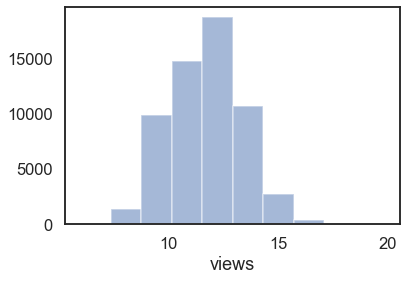

In [34]:
numbins = 100
mybins = np.linspace(views_stat.min(), views_stat.max(), numbins)
myhist = np.zeros(numbins-1, dtype='float64')


plt.hist(views_stat ,alpha=0.5)
plt.xlabel('views')
plt.show()

In [63]:
mean_data = np.mean(data['views'])
std = np.std(data['views'])
std_err = std / math.sqrt(len(data['views']))

In [64]:
from scipy.stats import norm
import math

z_value = 1.96
mean = np.mean(data['views'])
std = np.std(data['views'])
std_err = std / math.sqrt(len(data['views']))
margin_err = z_value * std_err
#margin_err = (conf_int[1]-conf_int[0])*0.5
conf_int = (mean - margin_err, mean + margin_err)

print('Standard Error (SE) = %.3f' %std_err)
print('Margin of Error (Bootstrap Method) = %.3f' %margin_err)
print('99.9%% Confidence interval[%.2f, %.2f]' %(conf_int[0], conf_int[1]))

Standard Error (SE) = 13773.190
Margin of Error (Bootstrap Method) = 26995.452
99.9% Confidence interval[512584.56, 566575.47]


### Bootstrap Test: the hypothesis is the mean of views are 500000 

In [65]:
def diff_from_hypo(data, views = 500000): # 539580.02
    return np.mean(data) - 500000

def bootstrap_replicate_1d(data, func):
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

def draw_bs_reps(data, func, size=1):
    bs_replicates = np.empty(size)

    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

In [66]:
bs_replicates = draw_bs_reps(data['views'], np.mean, 10000)
conf_int = np.percentile(bs_replicates, [0.05, 99.95])
conf_int
print('99.9%% Confidence interval is = [%.3f, %.3f]' %(conf_int[0], conf_int[1]))

99.9% Confidence interval is = [499823.010, 589034.310]


In [67]:
sample = np.random.choice(data['views'], 1000)
diff_val = diff_from_hypo(sample, 500000)
sample_shifted = sample - np.mean(sample) + 500000

In [68]:
bs_replicates = draw_bs_reps(sample_shifted, diff_from_hypo, 10000)
p_value = np.sum(bs_replicates <= diff_val) / len(bs_replicates)
p_value

0.6842

In [69]:
from statsmodels.stats.weightstats import ztest

ztest(sample, value = 500000)

(0.4128196675207146, 0.6797387407447166)

In [70]:
from scipy.stats import ttest_1samp

ttest_1samp(data['views'], 500000)

Ttest_1sampResult(statistic=2.8736755481900143, pvalue=0.004058713287770456)

#### Because the sample size is greater than 30, z-test is correct. We can accept the null- hypothesis. 

In [71]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

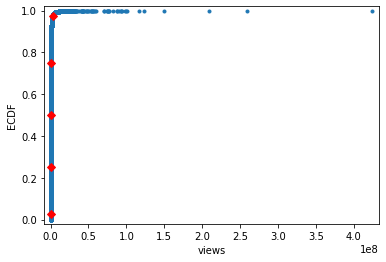

In [72]:
# Compute mean and standard deviation: mu, sigma
mu = np.mean(data['views'])
sigma = np.std(data['views'])

x_cl, y_cl = ecdf(data['views'])


_ = plt.plot(x_cl, y_cl, marker='.', linestyle='none')

# Make the margins nice
plt.margins(0.02)

# Label the axes
plt.ylabel('ECDF')
plt.xlabel('views')

# overlay percentiles as red diamonds
percentiles = np.array([2.5, 25, 50, 75, 97.5])
ptiles_cl = np.percentile(data['views'], percentiles)
_ = plt.plot(ptiles_cl, percentiles/100, marker='D', color='red',
         linestyle='none')

# Display the plot
plt.show()

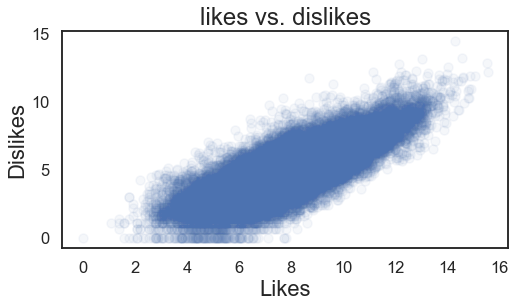

In [96]:
plt.figure(figsize=(8, 4))
plt.scatter(x=X_reg_stat['likes'], y=X_reg_stat['dislikes'], alpha = .05)

plt.xlabel('Likes', fontsize=22)
plt.ylabel('Dislikes', fontsize=22)
plt.title('likes vs. dislikes', fontsize=24)

plt.show();

In [82]:
X_reg_stat[['likes', 'dislikes']].corr()

,likes,dislikes
likes,1.000000,0.786515
dislikes,0.786515,1.000000


In [83]:
data[['likes', 'dislikes']].corr()

,likes,dislikes
likes,1.000000,0.405248
dislikes,0.405248,1.000000


#### The correlation between likes  and dislikes is around 0.78

#### Setup an appropriate hypothesis test.

- H0: 'likes' and 'dislikes'are uncorrelated
- Ha: 'likes' and 'dislikes' are not uncorrelated



In [97]:
clean_data = data.dropna(subset = ['likes'])
clean_data = data.dropna(subset = ['dislikes'])


In [99]:
likes = clean_data['likes']
dislikes = clean_data['dislikes']

mean, mean_h0 = np.corrcoef(likes, dislikes)[0, 1], 0
n = len(X_reg_stat['likes'])

print('Mean of likes and dislikes is %.6f ' %(mean))


Mean of likes and dislikes is 0.405248 


In [100]:
#standard error
standard_error = np.sqrt((1-mean**2)/(n-2))
z = (mean-mean_h0)/standard_error

p = 2*stats.norm.cdf(z)



print('Standard Error (SE) = %.5f' %standard_error)
print('z-statistics value = %.4f' %z)
print('p-value using z-statistics = %.2f' %p)

Standard Error (SE) = 0.00377
z-statistics value = 107.4602
p-value using z-statistics = 2.00


In [101]:


confidence=99

#Using stats.norm.ppf  -- Percent Point Function
margin_of_error = stats.norm.ppf(0.05+confidence/200)*standard_error
confidence_interval = [mean-margin_of_error, mean+margin_of_error]

print('Margin of Error = %.5f' %margin_of_error)
print('Confidence interval is between %.5f and %.5f' %(confidence_interval[0], confidence_interval[1]))



Margin of Error = 0.00043
Confidence interval is between 0.40482 and 0.40567


### Data Mining:
- To predict the number views based on the other features 

### Linear Regression:

In [73]:
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
from scipy import stats
import seaborn as sns

In [74]:
data = data.reindex(columns=[
    #'video_id','trending_date', 'title','channel_title',
    'views','likes',
               'dislikes','comment_count','video_title_count_word','video_tags_count_word'
               ,'count_unique_word_tags','video_title_count_punctuations','video_tag_count_punctuations',
               'video_title_count_words_upper','video_tag_count_words_upper','video_title_count_words_title'])

In [75]:
yt_data = data[[
    #'video_id','trending_date', 'title','channel_title',
    'views','likes',
               'dislikes','comment_count','video_title_count_word','video_tags_count_word'
               ,'count_unique_word_tags','video_title_count_punctuations','video_tag_count_punctuations',
               'video_title_count_words_upper','video_tag_count_words_upper','video_title_count_words_title']]

In [76]:
#Using Regression model:
X = yt_data.drop(['views'], axis = 1) 
Y = yt_data.views

train_X, val_X, train_y, val_y = train_test_split(X, Y, random_state=1)

lm = LinearRegression()

lm.fit(train_X, train_y)
lm_val_y_pred = lm.predict(val_X)
lm_residual = val_y - lm_val_y_pred

print('The predicated value is {}' .format(lm_val_y_pred))
print('The intercept value is {}' .format(lm.intercept_))

print (r2_score(y_pred=lm.predict(train_X), y_true=train_y))
print (r2_score(y_pred=lm.predict(val_X), y_true=val_y))

The predicated value is [ 299027.43697562  624809.62520899  265436.0024925  ...  280379.36682956
 -232407.75860762  242040.51740769]
The intercept value is -355467.77902107313
0.6175248159680112
0.7443449405753207


In [77]:
# Calculate the absolute errors
errors = abs(lm_residual)

print('Mean Absolute Error:', round(np.mean(errors), 2))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / val_y)
print('Mean absolute percentage error:', round(np.mean(mape), 2))

RMSE = np.sqrt(mean_squared_error(val_y , lm_val_y_pred))
print('RMSE:', round(RMSE))
               
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 426495.41
Mean absolute percentage error: 343.93
RMSE: 1567947.0
Accuracy: -243.93 %.


C:\Users\EliEm\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


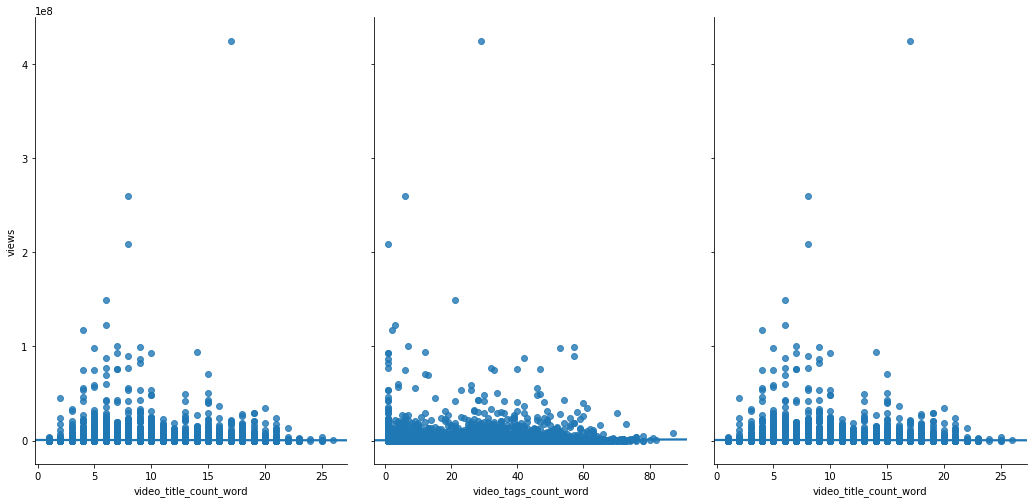

In [78]:
sns.pairplot(data, x_vars=['video_title_count_word','video_tags_count_word','video_title_count_word'], y_vars='views', size=7, aspect=0.7, kind='reg')

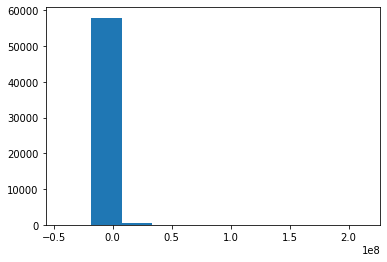

In [79]:
plt.hist(lm.predict(X))
plt.show()

In [80]:
# The coefficients
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,likes,45.712444
1,dislikes,100.874423
2,comment_count,-132.020673
3,video_title_count_word,17406.302646
4,video_tags_count_word,1634.940069
5,count_unique_word_tags,7525.010445
6,video_title_count_punctuations,3265.480797
7,video_tag_count_punctuations,-534.528248
8,video_title_count_words_upper,-25474.540695
9,video_tag_count_words_upper,1203.763711


In [81]:
y1 = np.log(data.views)

X1 = data[['likes','dislikes','comment_count','video_title_count_word',
           'video_tags_count_word','video_title_count_word']]


tmp_log = np.log(data[['views','likes','dislikes','comment_count','video_title_count_word',
           'video_tags_count_word']]+1)


X_reg = tmp_log[['likes','dislikes','comment_count','video_title_count_word',
           'video_tags_count_word']]

y_reg = tmp_log.views
print('y')
print(y1.describe(percentiles=[.05,.25,.5,.75,.95]))
print('y_reg')
print(y_reg.describe(percentiles=[.05,.25,.5,.75,.95]))

y
count    58603.000000
mean        11.766592
std          1.613571
min          6.021023
5%           9.228995
25%         10.563530
50%         11.798390
75%         12.878830
95%         14.393694
max         19.866514
Name: views, dtype: float64
y_reg
count    58603.000000
mean        11.766617
std          1.613539
min          6.023448
5%           9.229093
25%         10.563556
50%         11.798398
75%         12.878832
95%         14.393694
max         19.866514
Name: views, dtype: float64


In [82]:
train_X, val_X, train_y, val_y = train_test_split(X_reg, y_reg, test_size=.3)

lm_log = LinearRegression()

lm_log.fit(train_X, train_y)
val_y_lm_log_pred = lm_log.predict(val_X)

lm_log_residual = val_y - val_y_lm_log_pred

print('The predicated value is {}' .format(val_y_lm_log_pred))

from sklearn.metrics import mean_absolute_error
val_mae = mean_absolute_error(val_y_lm_log_pred, val_y)


print (r2_score(y_pred=lm_log.predict(train_X), y_true=train_y))
print (r2_score(y_pred=lm_log.predict(val_X), y_true=val_y))

The predicated value is [10.82839159 13.2804823  11.66901487 ... 10.20860791 13.8013608
 14.61605148]
0.7436692118888024
0.7417136142141464


In [83]:
# Calculate the absolute errors
errors = abs(lm_log_residual)

print('Mean Absolute Error:', round(np.mean(errors), 2))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / val_y)
print('Mean absolute percentage error:', round(np.mean(mape), 2))

RMSE = np.sqrt(mean_squared_error(val_y , val_y_lm_log_pred))
print('RMSE:', round(RMSE))
               
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.63
Mean absolute percentage error: 5.51
RMSE: 1.0
Accuracy: 94.49 %.


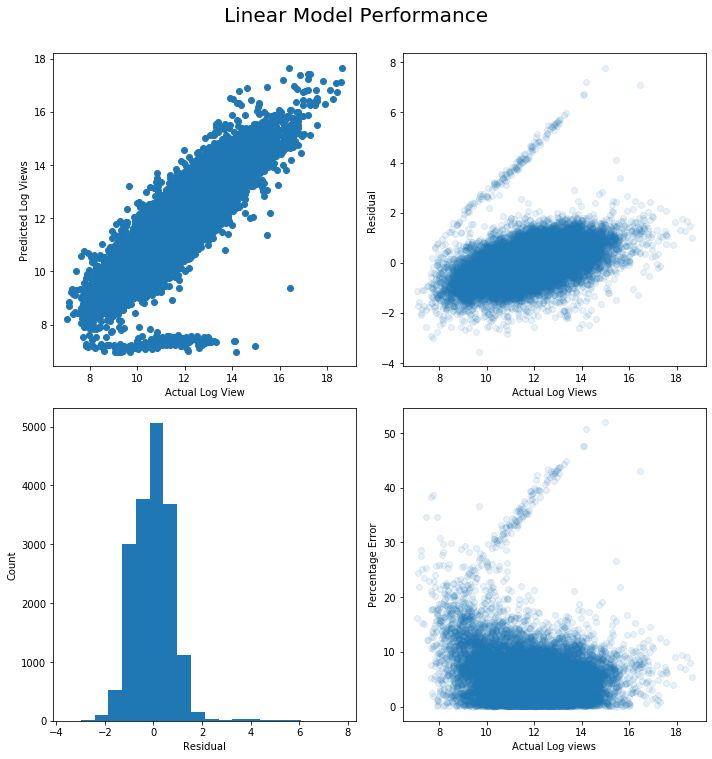

In [84]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.scatter(val_y,val_y_lm_log_pred)
plt.xlabel('Actual Log View')
plt.ylabel('Predicted Log Views')

plt.subplot(2,2,2)
plt.scatter(val_y,lm_log_residual,alpha = 0.1)
plt.xlabel('Actual Log Views')
plt.ylabel('Residual')
plt.subplot(2,2,3)
plt.hist(lm_log_residual, bins=20)
plt.xlabel('Residual')
plt.ylabel('Count')
plt.subplot(2,2,4)
plt.scatter(val_y, mape,alpha = 0.1)
plt.xlabel('Actual Log views')
plt.ylabel('Percentage Error')
plt.suptitle('Linear Model Performance',y = 1.05, size=20)
plt.tight_layout()
plt.savefig("D:/DataScienceFoundation/SpringBoard/YouTube Project/youtube-new/linear-model-perfo.png")
plt.show()

### Ridge Regression

In [85]:
regr_rdg = Ridge (alpha = .05)
train_X, val_X, train_y, val_y = train_test_split(X_reg, y_reg, random_state=1)

regr_rdg.fit(train_X, train_y)
y_rdg_prediction = regr_rdg.predict(val_X)
rdg_residual = val_y - y_rdg_prediction

print('The predicated value is {}' .format(y_rdg_prediction))


The predicated value is [11.3373095  14.53302433 11.16289929 ... 12.8341224  10.95910294
 11.58365543]


In [86]:
# Calculate the absolute errors
errors = abs(rdg_residual)

print('Mean Absolute Error:', round(np.mean(errors), 2))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / val_y)
print('Mean absolute percentage error:', round(np.mean(mape), 2))

RMSE = np.sqrt(mean_squared_error(val_y , y_rdg_prediction))
print('RMSE:', round(RMSE))
               
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.63
Mean absolute percentage error: 5.48
RMSE: 1.0
Accuracy: 94.52 %.


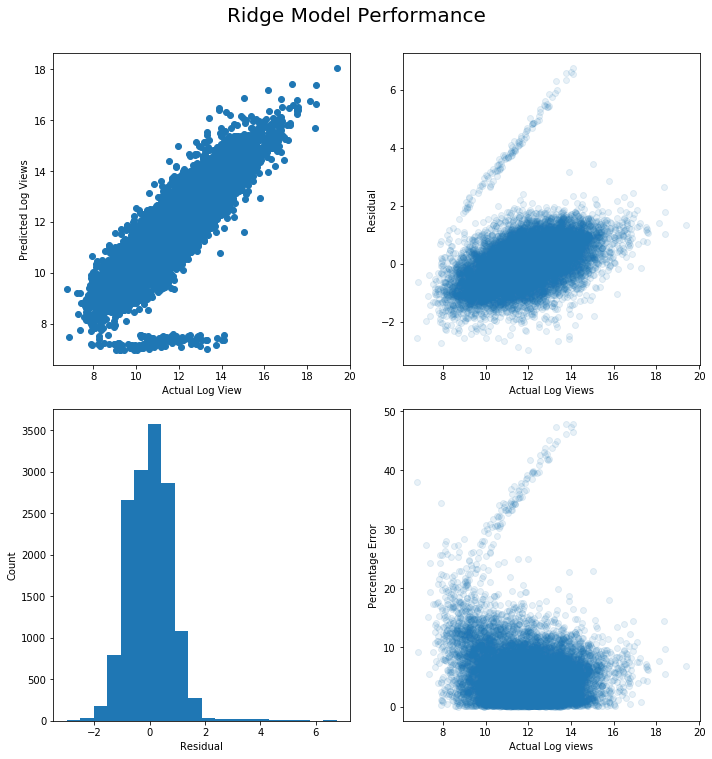

In [87]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.scatter(val_y,y_rdg_prediction)
plt.xlabel('Actual Log View')
plt.ylabel('Predicted Log Views')

plt.subplot(2,2,2)
plt.scatter(val_y,rdg_residual,alpha = 0.1)
plt.xlabel('Actual Log Views')
plt.ylabel('Residual')
plt.subplot(2,2,3)
plt.hist(rdg_residual, bins=20)
plt.xlabel('Residual')
plt.ylabel('Count')
plt.subplot(2,2,4)
plt.scatter(val_y, mape,alpha = 0.1)
plt.xlabel('Actual Log views')
plt.ylabel('Percentage Error')
plt.suptitle('Ridge Model Performance',y = 1.05, size=20)
plt.tight_layout()

plt.show()

Text(0.5, 1.0, 'log number of likes ~ views')

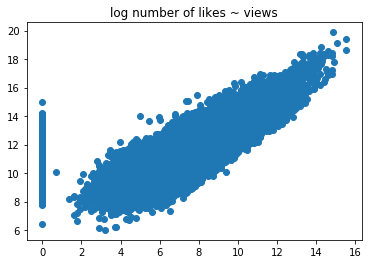

In [88]:
plt.scatter(tmp_log.likes,y1)
plt.title('log number of likes ~ views')

Text(0.5, 1.0, 'log number of comment_count ~ views')

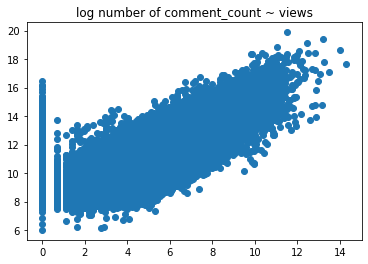

In [89]:
plt.scatter(tmp_log.comment_count,y1)
plt.title('log number of comment_count ~ views')

Text(0.5, 1.0, 'log number of dislikes ~ views')

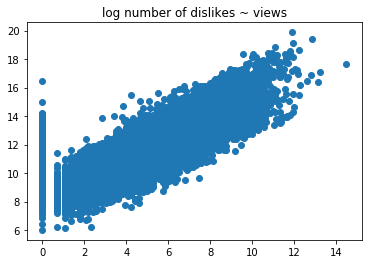

In [90]:
plt.scatter(tmp_log.dislikes,y1)
plt.title('log number of dislikes ~ views')

### Random Forest Regressor

In [91]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score


X = yt_data.drop(['views'], axis = 1) 
Y = yt_data.views

Xt, Xv, yt, yv= train_test_split(X ,Y, test_size=.3)
model_RF= RandomForestRegressor()
model_RF.fit(Xt, yt)

y_pred_val=model_RF.predict(Xv)
rf_residual = yv - y_pred_val


print (r2_score(y_pred=model_RF.predict(Xt), y_true=yt))
print (r2_score(y_pred=model_RF.predict(Xv), y_true=yv))

C:\Users\EliEm\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9598726566241153
0.531473931333116


In [92]:
# Calculate the absolute errors
errors = abs(y_pred_val - yv)

print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / yv)
print('Mean absolute percentage error:', round(np.mean(mape), 2))

RMSE = np.sqrt(mean_squared_error(yv , y_pred_val))
print('RMSE:', round(RMSE))
               
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 264760.38 degrees.
Mean absolute percentage error: 67.04
RMSE: 3130231.0
Accuracy: 32.96 %.


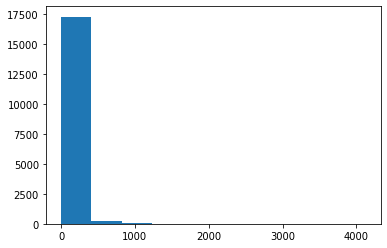

In [93]:
plt.hist(np.abs(mape));

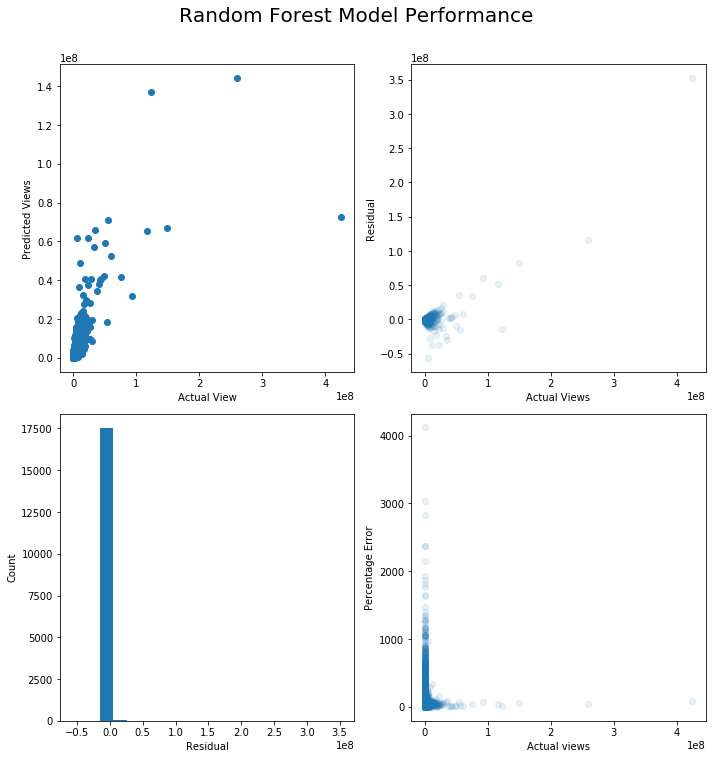

In [94]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.scatter(yv,y_pred_val)
plt.xlabel('Actual View')
plt.ylabel('Predicted Views')

plt.subplot(2,2,2)
plt.scatter(yv,rf_residual,alpha = 0.1)
plt.xlabel('Actual Views')
plt.ylabel('Residual')
plt.subplot(2,2,3)
plt.hist(rf_residual, bins=20)
plt.xlabel('Residual')
plt.ylabel('Count')
plt.subplot(2,2,4)
plt.scatter(yv, mape,alpha = 0.1)
plt.xlabel('Actual views')
plt.ylabel('Percentage Error')
plt.suptitle('Random Forest Model Performance',y = 1.05, size=20)
plt.tight_layout()

plt.show()

In [95]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score


Xt_log, Xv_log, yt_log, yv_log= train_test_split(X_reg, y_reg, test_size=.3)
model_RF_log= RandomForestRegressor()
model_RF_log.fit(Xt_log, yt_log)
y_pred_val=model_RF_log.predict(Xv_log)
rf_log_residual = yv_log - y_pred_val

print (r2_score(y_pred=model_RF_log.predict(Xt_log), y_true=yt_log))
print (r2_score(y_pred=model_RF_log.predict(Xv_log), y_true=yv_log))

C:\Users\EliEm\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9690249559747344
0.8282058574062504


In [96]:
# Calculate the absolute errors
errors = abs(y_pred_val - yv_log)

print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / yv_log)
print('Mean absolute percentage error:', round(np.mean(mape), 2))

RMSE = np.sqrt(mean_squared_error(yv_log , y_pred_val))
print('RMSE:', round(RMSE))
               
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.5 degrees.
Mean absolute percentage error: 4.3
RMSE: 1.0
Accuracy: 95.7 %.


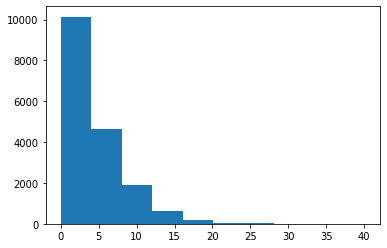

In [97]:

plt.hist(np.abs(mape));

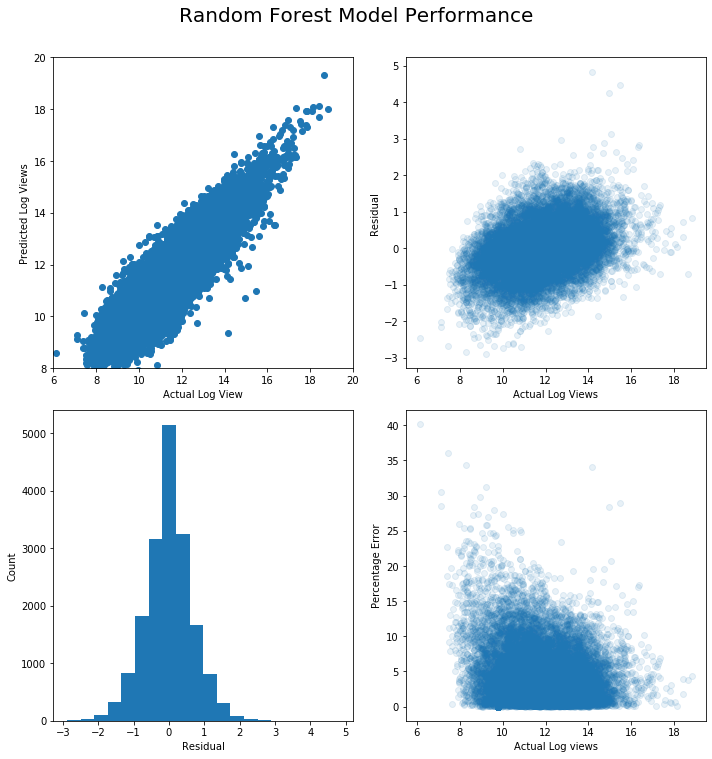

In [98]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.scatter(yv_log,y_pred_val)
plt.xlabel('Actual Log View')
plt.ylabel('Predicted Log Views')
plt.xlim([6,20])
plt.ylim([8,20])
plt.subplot(2,2,2)
plt.scatter(yv_log,rf_log_residual,alpha = 0.1)
plt.xlabel('Actual Log Views')
plt.ylabel('Residual')
plt.subplot(2,2,3)
plt.hist(rf_log_residual, bins=20)
plt.xlabel('Residual')
plt.ylabel('Count')
plt.subplot(2,2,4)
plt.scatter(yv_log, mape,alpha = 0.1)
plt.xlabel('Actual Log views')
plt.ylabel('Percentage Error')
plt.suptitle('Random Forest Model Performance',y = 1.05, size=20)
plt.savefig("D:/DataScienceFoundation/SpringBoard/YouTube Project/youtube-new/random-forest-model-perfo.png")
plt.tight_layout()

plt.show()

### Gradient Boosting Regressor

In [99]:
from sklearn.ensemble import  GradientBoostingRegressor

X = yt_data.drop(['views'], axis = 1) 
Y = yt_data.views

Xtgb, Xvgb, ytgb, yvgb= train_test_split(X ,Y, test_size=.3)
model_GBR= GradientBoostingRegressor()
model_GBR.fit(Xtgb, ytgb)
y_val_predication = model_GBR.predict(Xvgb)
residual_GBR = y_val_predication - yvgb

print (r2_score(y_pred=model_GBR.predict(Xtgb), y_true=ytgb))
print (r2_score(y_pred=model_GBR.predict(Xvgb), y_true=yvgb))

0.9498106206513858
0.5261869949995424


In [100]:
# Calculate the absolute errors
errors = abs(residual_GBR)

print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / yvgb)
print('Mean absolute percentage error:', round(np.mean(mape), 2))

RMSE = np.sqrt(mean_squared_error(yvgb , y_val_predication))
print('RMSE:', round(RMSE))
               
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')


Mean Absolute Error: 278343.66 degrees.
Mean absolute percentage error: 142.71
RMSE: 2730717.0
Accuracy: -42.71 %.


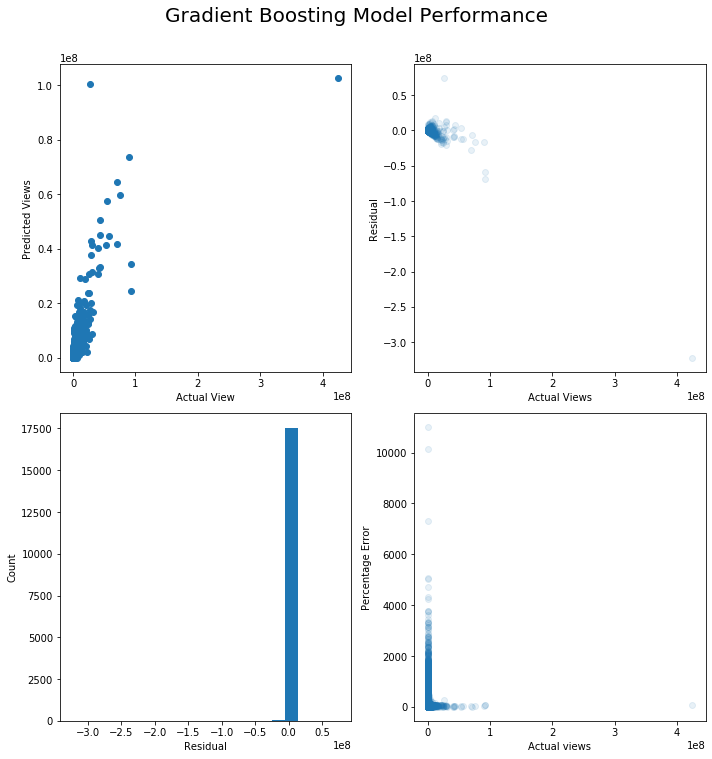

In [101]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.scatter(yvgb,y_val_predication)
plt.xlabel('Actual View')
plt.ylabel('Predicted Views')
plt.subplot(2,2,2)
plt.scatter(yvgb,residual_GBR,alpha = 0.1)
plt.xlabel('Actual Views')
plt.ylabel('Residual')
plt.subplot(2,2,3)
plt.hist(residual_GBR, bins=20)
plt.xlabel('Residual')
plt.ylabel('Count')
plt.subplot(2,2,4)
plt.scatter(yvgb, mape,alpha = 0.1)
plt.xlabel('Actual views')
plt.ylabel('Percentage Error')
plt.suptitle('Gradient Boosting Model Performance',y = 1.05, size=20)
plt.tight_layout()

plt.show()

In [102]:
Xtgb, Xvgb, ytgb, yvgb= train_test_split(X_reg ,y_reg, test_size=.3)
model_GBR= GradientBoostingRegressor()
model_GBR.fit(Xtgb, ytgb)
y_val_predication = model_GBR.predict(Xvgb)
residual_log_GBR = y_val_predication - yvgb

print (r2_score(y_pred=model_GBR.predict(Xtgb), y_true=ytgb))
print (r2_score(y_pred=model_GBR.predict(Xvgb), y_true=yvgb))

0.8381877340106707
0.8321555495384958


In [103]:
# Calculate the absolute errors
errors = abs(residual_log_GBR)

print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / yvgb)
print('Mean absolute percentage error:', round(np.mean(mape), 2))

RMSE = np.sqrt(mean_squared_error(yvgb , y_val_predication))
print('RMSE:', round(RMSE))
               
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.51 degrees.
Mean absolute percentage error: 4.44
RMSE: 1.0
Accuracy: 95.56 %.


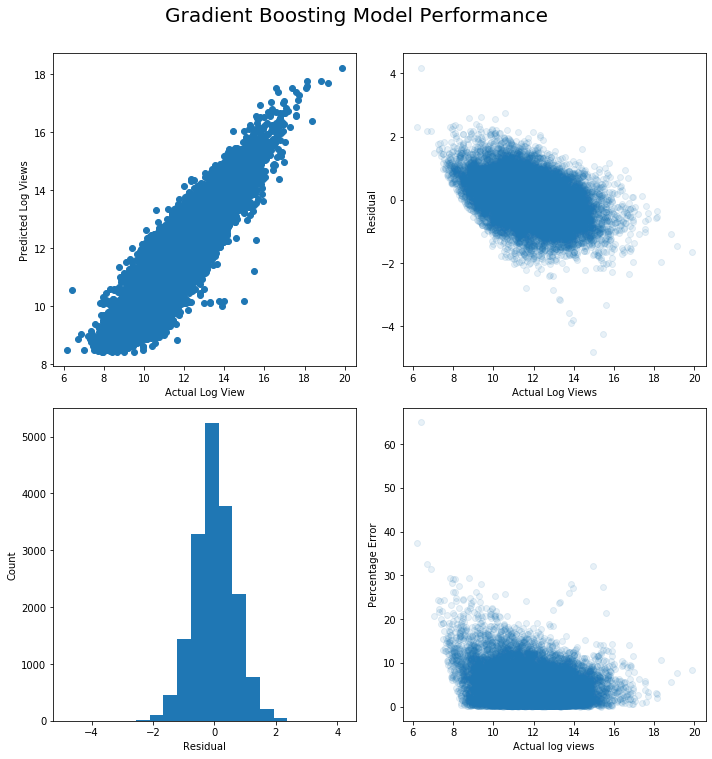

In [104]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.scatter(yvgb,y_val_predication)
plt.xlabel('Actual Log View')
plt.ylabel('Predicted Log Views')
plt.subplot(2,2,2)
plt.scatter(yvgb,residual_log_GBR,alpha = 0.1)
plt.xlabel('Actual Log Views')
plt.ylabel('Residual')
plt.subplot(2,2,3)
plt.hist(residual_log_GBR, bins=20)
plt.xlabel('Residual')
plt.ylabel('Count')
plt.subplot(2,2,4)
plt.scatter(yvgb, mape,alpha = 0.1)
plt.xlabel('Actual log views')
plt.ylabel('Percentage Error')
plt.suptitle('Gradient Boosting Model Performance',y = 1.05, size=20)
plt.savefig("D:/DataScienceFoundation/SpringBoard/YouTube Project/youtube-new/gradient-boost-model-perfo.png")
plt.tight_layout()

plt.show()

### XGBRegressor

In [105]:
y1 = np.log(data.views)

#X1_1 = data.drop(data.views)


tmp_log_1 = np.log(data +1)


X_reg_1 = tmp_log_1

y_reg = tmp_log.views
print('y')
print(y1.describe(percentiles=[.05,.25,.5,.75,.95]))
print('y_reg')

y
count    58603.000000
mean        11.766592
std          1.613571
min          6.021023
5%           9.228995
25%         10.563530
50%         11.798390
75%         12.878830
95%         14.393694
max         19.866514
Name: views, dtype: float64
y_reg


In [106]:
from xgboost.sklearn import XGBRegressor

Xtgbm, Xvgbm, ytgbm, yvgbm= train_test_split(X_reg ,y_reg, test_size=.3)

XGBModel = XGBRegressor()
XGBModel.fit(Xtgbm,ytgbm , verbose=False)

# Get the mean absolute error on the validation data :
XGBpredictions = XGBModel.predict(Xvgbm)
residual_XGBR = yvgbm - XGBpredictions

MAE = mean_absolute_error(yvgbm , XGBpredictions)
print('XGBoost validation MAE = ',MAE)
print (r2_score(y_pred=model_GBR.predict(Xvgbm), y_true=yvgbm))

C:\Users\EliEm\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:15:44] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBoost validation MAE =  0.5072883472078957
0.8368652630928312


In [128]:
tmp_x_reg = X_reg_1.drop(['views', 'video_title_count_word','video_title_count_punctuations'], axis = 1)
tmp_x_reg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58603 entries, 0 to 99200
Data columns (total 9 columns):
likes                            58603 non-null float64
dislikes                         58603 non-null float64
comment_count                    58603 non-null float64
video_tags_count_word            58603 non-null float64
count_unique_word_tags           58603 non-null float64
video_tag_count_punctuations     58603 non-null float64
video_title_count_words_upper    58603 non-null float64
video_tag_count_words_upper      58603 non-null float64
video_title_count_words_title    58603 non-null float64
dtypes: float64(9)
memory usage: 4.5 MB


In [129]:
from xgboost.sklearn import XGBRegressor

Xtgbm, Xvgbm, ytgbm, yvgbm= train_test_split(tmp_x_reg ,y_reg, test_size=.3)

XGBModel = XGBRegressor()
XGBModel.fit(Xtgbm,ytgbm , verbose=False)

# Get the mean absolute error on the validation data :
XGBpredictions = XGBModel.predict(Xvgbm)
residual_XGBR = yvgbm - XGBpredictions

MAE = mean_absolute_error(yvgbm , XGBpredictions)
print('XGBoost validation MAE = ',MAE)
print (r2_score(y_pred=XGBModel.predict(Xvgbm), y_true=yvgbm))

C:\Users\EliEm\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:19:56] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBoost validation MAE =  0.48279743284539534
0.8496997053477152


In [130]:
# Calculate the absolute errors
errors = abs(residual_XGBR)

print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / yvgbm)
print('Mean absolute percentage error:', round(np.mean(mape), 2))

RMSE = np.sqrt(mean_squared_error(yvgbm , XGBpredictions))
print('RMSE:', round(RMSE))
               
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.48 degrees.
Mean absolute percentage error: 4.2
RMSE: 1.0
Accuracy: 95.8 %.


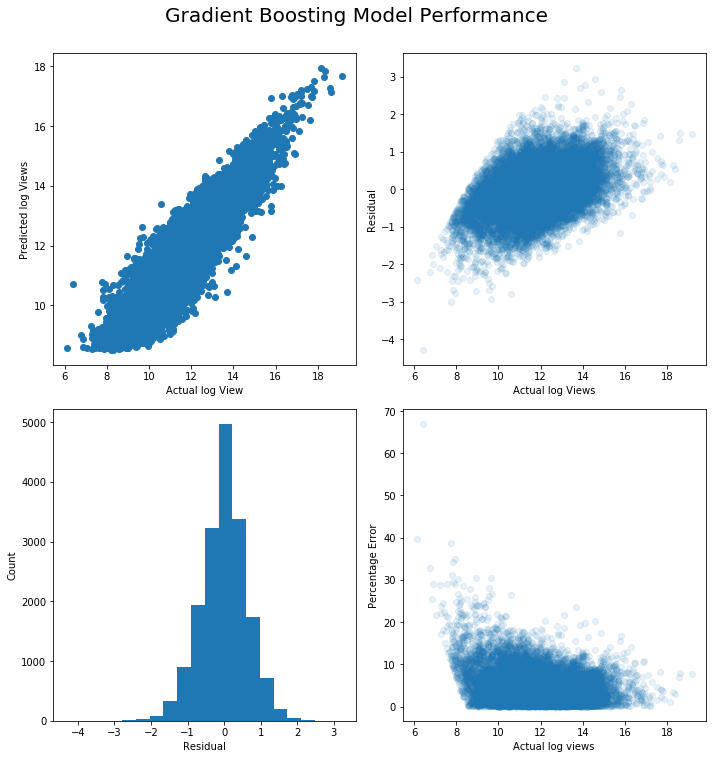

In [131]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.scatter(yvgbm,XGBpredictions)
plt.xlabel('Actual log View')
plt.ylabel('Predicted log Views')
plt.subplot(2,2,2)
plt.scatter(yvgbm,residual_XGBR,alpha = 0.1)
plt.xlabel('Actual log Views')
plt.ylabel('Residual')
plt.subplot(2,2,3)
plt.hist(residual_XGBR, bins=20)
plt.xlabel('Residual')
plt.ylabel('Count')
plt.subplot(2,2,4)
plt.scatter(yvgbm, mape,alpha = 0.1)
plt.xlabel('Actual log views')
plt.ylabel('Percentage Error')
plt.suptitle('Gradient Boosting Model Performance',y = 1.05, size=20)
plt.savefig("D:/DataScienceFoundation/SpringBoard/YouTube Project/youtube-new/Xgradient-boost-model-perfo.png")
plt.tight_layout()

plt.show()

### Feature Importance

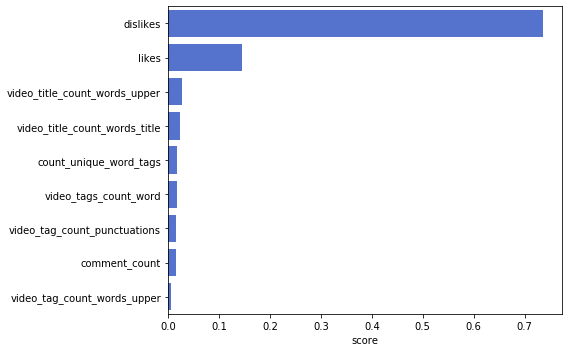

In [132]:
xg_feature_importances = pd.DataFrame({'score':XGBModel.feature_importances_,
                                      'feature': tmp_x_reg.columns})
xg_feature_importances = xg_feature_importances.sort_values('score',ascending=False)[:15]

plt.figure(figsize=(8,5))
sns.barplot(data = xg_feature_importances,y='feature',x='score',color='royalblue')
plt.ylabel('')
plt.tight_layout()
#plt.savefig(figure_folder + 'xg_feat_importance.png');

### DummyRegressor

In [112]:
from sklearn.dummy import DummyRegressor

X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg, random_state=0)

dummy_mean = DummyRegressor(strategy='mean')
dummy_mean.fit(X_train, y_train)


dummy_constant = DummyRegressor(strategy='constant', constant=20)

# "Train" dummy regressor
dummy_constant.fit(X_train, y_train)
y_predict = dummy_constant.predict(X_test)

residual = y_test - y_predict 

# Get R-squared score
dummy_constant.score(X_test, y_test) 


-25.920444647732158

In [113]:
# Calculate the absolute errors
errors = abs(residual)

print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
print('Mean absolute percentage error:', round(np.mean(mape), 2))

RMSE = np.sqrt(mean_squared_error(y_test , y_predict))
print('RMSE:', round(RMSE))
               
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 8.24 degrees.
Mean absolute percentage error: 73.48
RMSE: 8.0
Accuracy: 26.52 %.


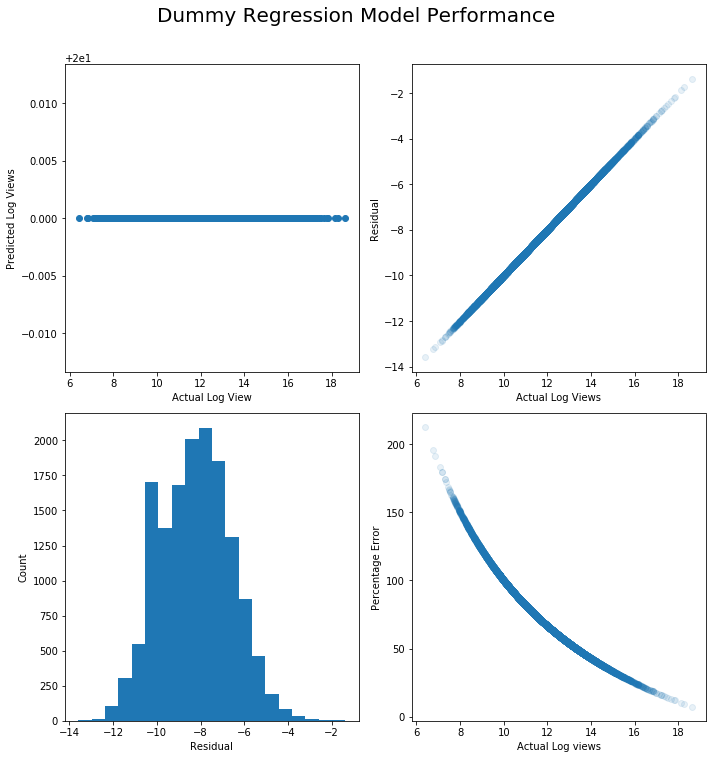

In [114]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.scatter(y_test,y_predict)
plt.xlabel('Actual Log View')
plt.ylabel('Predicted Log Views')
plt.subplot(2,2,2)
plt.scatter(y_test,residual,alpha = 0.1)
plt.xlabel('Actual Log Views')
plt.ylabel('Residual')
plt.subplot(2,2,3)
plt.hist(residual, bins=20)
plt.xlabel('Residual')
plt.ylabel('Count')
plt.subplot(2,2,4)
plt.scatter(y_test, mape,alpha = 0.1)
plt.xlabel('Actual Log views')
plt.ylabel('Percentage Error')
plt.suptitle('Dummy Regression Model Performance',y = 1.05, size=20)
plt.tight_layout()

plt.show()

### STATS Model

In [115]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

stats.describe(lm.predict(X))

DescribeResult(nobs=58603, minmax=(-43868271.36014794, 214116934.00798687), mean=535102.3791189592, variance=7280438269494.725, skewness=24.208749070482, kurtosis=1162.4232920574827)

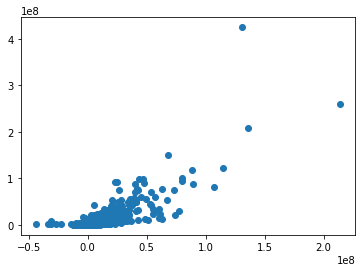

In [116]:
plt.scatter(lm.predict(X),data.views)

In [117]:
#Residual Sum-of-Squares 
print(np.sum((data.views - lm.predict(X)) ** 2))

#Explained Sum-of-Squares 
print(np.sum((lm.predict(X) - np.mean(data.views)) ** 2))

2.3131168755282397e+17
4.266494184142484e+17


In [118]:
m = ols('views ~ video_title_count_word',data).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  views   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     10.94
Date:                Mon, 02 Dec 2019   Prob (F-statistic):           0.000943
Time:                        21:15:58   Log-Likelihood:            -9.6335e+05
No. Observations:               58603   AIC:                         1.927e+06
Df Residuals:                   58601   BIC:                         1.927e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               6.53

                            OLS Regression Results                            
Dep. Variable:                  views   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     67.79
Date:                Mon, 02 Dec 2019   Prob (F-statistic):           3.93e-30
Time:                        21:15:59   Log-Likelihood:            -9.6329e+05
No. Observations:               58603   AIC:                         1.927e+06
Df Residuals:                   58600   BIC:                         1.927e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               5.68

Text(0, 0.5, 'Residuals')

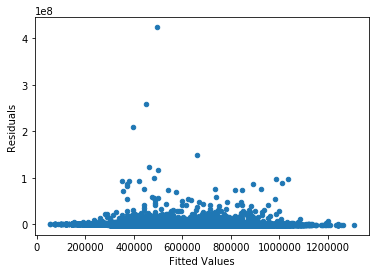

In [119]:
# Take the reduced model from Part 3
m = ols('views ~ video_title_count_word+video_tags_count_word+video_title_count_word',data).fit()
print(m.summary())
# Plot fitted values vs redisuals
plt.scatter(m.fittedvalues, m.resid, s=20)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')

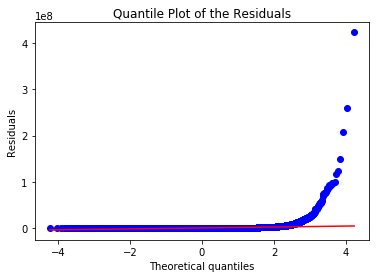

In [120]:
from scipy.stats import probplot
probplot(m.resid,  plot = plt)
_ = plt.ylabel('Residuals')
_ = plt.title('Quantile Plot of the Residuals')
plt.show()